# Differencial equations

## Numerical integration

This part cover the chapter 1.8 page 36 to 52 of the book "Orbital mechanics for Engineering Students" (ISBN: 978-0-08-097747-a)

In the book the presented example is a system with a masse, a string and a damper. 

The equation of the model is the following:
$$ \ddot{x} + 2\zeta \omega_n\dot{x} + \omega_n^2 x = \frac{F(t)}{m} $$
$F(t)$ is a sinusoidal force of an amplitufe of $F_0$ and a circular frequency of $\omega$.

The solution of this differential equation is:
$$ x = e^{-\zeta \omega_n t} (A\sin{\omega_d t}+ B\cos{\omega_d t})
    + \frac{F_0/m}{(\omega_n^2 - \omega^2)^2 + (2\omega \omega_n \zeta)^2}
    [(\omega_n^2 - \omega^2)\sin{\omega t} - 2 \omega \omega_n \zeta \cos{\omega t}]$$
With
$$ A = \zeta \frac{\omega_n}{\omega_d} x_0 + \frac{\dot{x}_0}{\omega_d}
    + \frac{\omega^2 + (2\zeta^2 - 1)\omega_n^2}
           {(\omega_n^2 - \omega^2)^2 + (2\omega\omega_n \zeta)^2}
    \frac{\omega}{\omega_d}
    \frac{F_0}{m}$$
    
and
$$ B = x_0 + \frac{2 \omega \omega_n \zeta}{(\omega_n^2 - \omega^2)^2 + (2 \omega \omega_n \zeta)^2}
        \frac{F_0}{m}$$
        
with $$ \omega_d = \omega_n \sqrt{1-\zeta^2}$$

### Example

Example for t=0 to t=110

$ m = 1 kg$

$\omega_n = 1 rad/s $

$\zeta = 0.03 $

$F_0 = 1N $

$\omega = 0.4 rad/s $

and for initial condition $x = \dot{x} =0 $

Representation with Python

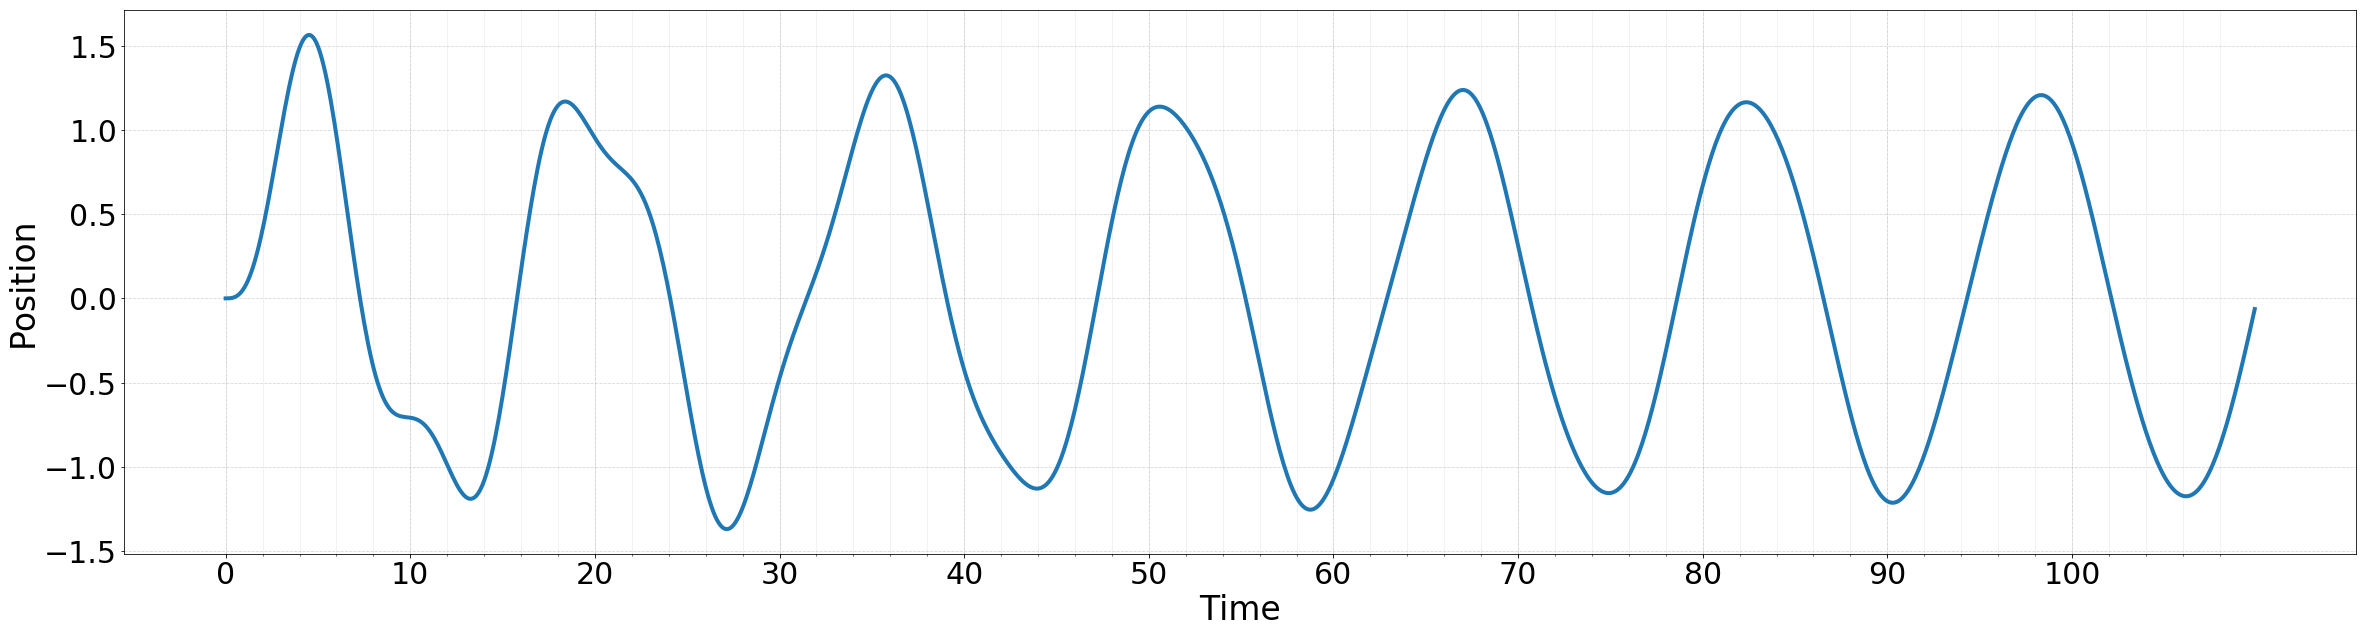

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

def general_x(t, x_0, xdot_0,  m, zeta, omega_n, omega, F_0):
    omega_d = omega_n * math.sqrt(1-zeta**2)
    
    A = zeta*(omega_n/omega_d)*x_0 + xdot_0 / omega_d \
    + (omega**2 + (2*zeta**2 - 1)*omega_n**2) / (((omega_n**2 - omega**2)**2 + (2*omega*omega_n*zeta)**2)) \
    * (omega / omega_d) * (F_0 / m)
    
    B = x_0 + ((2*omega*omega_n*zeta) / (((omega_n**2 - omega**2)**2 + (2*omega*omega_n*zeta)**2))) * (F_0 / m)
    
    y = math.exp(-zeta * omega_n * t)*(A*math.sin(omega_d*t) + B*math.cos(omega_d*t)) \
        + ((F_0 / m)/((omega_n**2 - omega**2)**2 + (2*omega*omega_n*zeta)**2)) \
        * ((omega_n**2 - omega**2) * math.sin(omega*t) - (2*omega*omega_n*zeta*math.cos(omega*t)))
    return y

def x(t=0):
    x_0 = 0
    xdot_0 = 0
    m = 1
    zeta = 0.03
    omega = 0.4
    omega_n = 1
    F_0 = 1
    
    return general_x(t, x_0, xdot_0,  m, zeta, omega_n, omega, F_0)

t0 = 0.0
t_end = 110.0
step = 0.1

y_exact = []

t_exact = np.arange(t0, t_end, step)

for i in t_exact:
    y_exact.append(x(i))

major_xticks = np.arange(0, 110, 10)                                              
minor_xticks = np.arange(0, 110, 2)                                                   
    
fig, ax = plt.subplots(figsize=(40,10))

ax.set_xticks(major_xticks)                                                       
ax.set_xticks(minor_xticks, minor=True)                                           
#ax.set_yticks(major_ticks)                                                       
#ax.set_yticks(minor_ticks, minor=True)

ax.grid(linestyle='--')
ax.plot(t_exact, y_exact, linewidth=4)
ax.grid(which='minor', alpha=0.2)                                                
ax.grid(which='major', alpha=0.5) 
ax.tick_params(labelsize=30)
plt.xlabel('Time', fontsize=33)
plt.ylabel('Position', fontsize=33)
plt.show()

## Runge-Kutta Algorithm

Please refere to page 41 for the details.

In [72]:
import copy

def rk1_4(ode_function, tspan, y0, h, rk):
    '''Runge_Kutta numerical integration algorithm
    
    Parameters:
        ode_function: derivate of f
        tspan: vector [t0, tf] giving the time interval for the solution
        y0: vector of the initial value of y
        h: time step
        rk: rank from 1 to 4 (RK1 Euler's method, RK2 Heun's method, RK3, RK4)'''
    
    if rk == 1:
        n_stage = 1
        a = np.array((0,))
        b = np.array((0,))
        c = np.array((1,))
    elif rk == 2:
        n_stage = 2
        a = np.array( (0, 1.0) )
        b = np.array( ((0, 1.0), \
                       (0, 0)) ) 
        c = np.array( (1/2.0, 1/2.0) )
    elif rk == 3:
        n_stage = 3
        a = np.array( (0, 1/2.0, 1) )
        b = np.array( ((0, 0), \
            (1/2.0, 0), \
            (-1.0, 2.0)) )
        c = np.array( (1/6.0, 2/3.0, 1/6.0) )
    elif rk == 4:
        n_stage = 4
        a = np.array( (0, 1/2.0, 1/2.0, 1) )
        b = np.array( ((0, 0, 0), \
            (1/2.0, 0, 0), \
            (0, 1/2.0, 0), \
            (0, 0, 1.0)) )
        c = np.array( (1/6.0, 1/3.0, 1/3.0, 1/6.0))
    else:
        raise ValueError('The rank must be 1 ,2 ,3 or 4.')
    
    t0 = tspan[0]
    tf = tspan[1]
    t = t0
    y = np.array(y0)
    tout = [t]
    yout = [y]
    
    while t < tf:
        f = []
        ti = t
        yi = copy.copy(y)
        for i in range(1, n_stage+1):
            t_inner = ti + a[i-1]*h
            y_inner = copy.copy(yi)
            for j in range(1, i):
                #print("b[", i, "][", j, "] = ", b[i-1][j-1], " f:", f[j-1] )
                y_inner = y_inner + h*b[i-1][j-1] * f[j-1]
            #print("t_inner: ", t_inner, " y_inner: ", y_inner)
            f.append(ode_function(t_inner, y_inner))

        fmat = np.array(f).T
        yimat = yi
        y = yimat + h * np.dot(fmat, c.reshape(len(c), 1)).T[0]
        #print("t = ", t, " y = ", y)
        tout.append(t)
        yout.append(y)
        h = min(h, tf - t)
        t = t + h 
    
    return tout, yout

In [73]:
sol = rk1_4(rates, [0, 10], [0.0, 0.0], 0.01, 4)

In [22]:
def rates(t, f):
    #print("f =" ,f)
    #print("t =", t)
    #print("---------------")
    x = f[0]
    Dx = f[1]
    
    m = 1
    z = 0.03
    wn = 1
    Fo = 1
    w = 0.4*wn
    
    D2x = Fo/m*math.sin(w*t) - 2*z*wn*Dx - x*wn**2
    
    #print("x = ", x, " Dx = ", Dx, " D2x = ", D2x)
    
    return np.array((Dx, D2x))

sol_rk1_1 = rk1_4(rates, [0, 110], [0.0, 0.0], 0.01, 1)
sol_rk1_2 = rk1_4(rates, [0, 110], [0.0, 0.0], 0.1, 1)

sol_rk2_1 = rk1_4(rates, [0, 110], [0.0, 0.0], 0.1, 2)
sol_rk2_2 = rk1_4(rates, [0, 110], [0.0, 0.0], 0.5, 2)

sol_rk3_1 = rk1_4(rates, [0, 110], [0.0, 0.0], 0.5, 3)
sol_rk3_2 = rk1_4(rates, [0, 110], [0.0, 0.0], 0.1, 3)

sol_rk4_1 = rk1_4(rates, [0, 110], [0.0, 0.0], 1, 4)
sol_rk4_2 = rk1_4(rates, [0, 110], [0.0, 0.0], 2, 4)

y =  [ 0.  0.]
y =  [  0.00000000e+00   3.99998933e-05]
y =  [  3.99998933e-07   1.19975040e-04]
y =  [  1.59974933e-06   2.39896175e-04]
y =  [  3.99871108e-06   3.99729413e-04]
y =  [  7.99600522e-06   5.99436255e-04]
y =  [  1.39903678e-05   8.38973594e-04]
y =  [  2.23801037e-05   1.11829372e-03]
y =  [  3.35630409e-05   1.43734433e-03]
y =  [  4.79364843e-05   1.79606854e-03]
y =  [  6.58971697e-05   2.19440488e-03]
y =  [  8.78412185e-05   2.63228730e-03]
y =  [ 0.00011416  0.00310965]
y =  [ 0.00014526  0.0036264 ]
y =  [ 0.00018152  0.00418248]
y =  [ 0.00022335  0.0047778 ]
y =  [ 0.00027113  0.00541226]
y =  [ 0.00032525  0.00608578]
y =  [ 0.00038611  0.00679825]
y =  [ 0.00045409  0.00754958]
y =  [ 0.00052959  0.00833966]
y =  [ 0.00061298  0.00916837]
y =  [ 0.00070467  0.0100356 ]
y =  [ 0.00080502  0.01094124]
y =  [ 0.00091443  0.01188515]
y =  [ 0.00103329  0.01286721]
y =  [ 0.00116196  0.01388728]
y =  [ 0.00130083  0.01494523]
y =  [ 0.00145028  0.01604092]
y =  [ 

y =  [ 0.857855   -0.76401568]
y =  [ 0.85021484 -0.76583552]
y =  [ 0.84255649 -0.76760897]
y =  [ 0.8348804  -0.76933599]
y =  [ 0.82718704 -0.77101653]
y =  [ 0.81947687 -0.77265053]
y =  [ 0.81175037 -0.77423797]
y =  [ 0.80400799 -0.7757788 ]
y =  [ 0.7962502  -0.77727298]
y =  [ 0.78847747 -0.7787205 ]
y =  [ 0.78069027 -0.78012133]
y =  [ 0.77288905 -0.78147543]
y =  [ 0.7650743  -0.78278281]
y =  [ 0.75724647 -0.78404345]
y =  [ 0.74940604 -0.78525733]
y =  [ 0.74155346 -0.78642446]
y =  [ 0.73368922 -0.78754483]
y =  [ 0.72581377 -0.78861845]
y =  [ 0.71792759 -0.78964534]
y =  [ 0.71003113 -0.79062549]
y =  [ 0.70212488 -0.79155893]
y =  [ 0.69420929 -0.79244568]
y =  [ 0.68628483 -0.79328577]
y =  [ 0.67835197 -0.79407922]
y =  [ 0.67041118 -0.79482606]
y =  [ 0.66246292 -0.79552635]
y =  [ 0.65450766 -0.79618011]
y =  [ 0.64654586 -0.79678739]
y =  [ 0.63857798 -0.79734824]
y =  [ 0.6306045  -0.79786272]
y =  [ 0.62262587 -0.79833089]
y =  [ 0.61464256 -0.7987528 ]
y =  [ 0

y =  [-1.02443279 -0.2559966 ]
y =  [-1.02699276 -0.25547156]
y =  [-1.02954748 -0.25491481]
y =  [-1.03209662 -0.25432625]
y =  [-1.03463989 -0.25370579]
y =  [-1.03717694 -0.25305337]
y =  [-1.03970748 -0.2523689 ]
y =  [-1.04223117 -0.25165231]
y =  [-1.04474769 -0.25090354]
y =  [-1.04725673 -0.25012251]
y =  [-1.04975795 -0.24930916]
y =  [-1.05225104 -0.24846343]
y =  [-1.05473568 -0.24758527]
y =  [-1.05721153 -0.24667462]
y =  [-1.05967828 -0.24573144]
y =  [-1.06213559 -0.24475568]
y =  [-1.06458315 -0.24374729]
y =  [-1.06702062 -0.24270624]
y =  [-1.06944768 -0.24163249]
y =  [-1.07186401 -0.24052602]
y =  [-1.07426927 -0.23938678]
y =  [-1.07666313 -0.23821476]
y =  [-1.07904528 -0.23700993]
y =  [-1.08141538 -0.23577228]
y =  [-1.0837731  -0.23450179]
y =  [-1.08611812 -0.23319845]
y =  [-1.08845011 -0.23186224]
y =  [-1.09076873 -0.23049318]
y =  [-1.09307366 -0.22909125]
y =  [-1.09536457 -0.22765646]
y =  [-1.09764114 -0.22618881]
y =  [-1.09990303 -0.22468831]
y =  [-1

y =  [ 1.18287364  0.00276837]
y =  [  1.18290132e+00  -4.54150276e-04]
y =  [ 1.18289678 -0.00365473]
y =  [ 1.18286023 -0.00683319]
y =  [ 1.1827919  -0.00998936]
y =  [ 1.18269201 -0.01312308]
y =  [ 1.18256078 -0.01623419]
y =  [ 1.18239843 -0.01932252]
y =  [ 1.18220521 -0.02238792]
y =  [ 1.18198133 -0.02543023]
y =  [ 1.18172703 -0.02844931]
y =  [ 1.18144253 -0.03144499]
y =  [ 1.18112808 -0.03441713]
y =  [ 1.18078391 -0.03736559]
y =  [ 1.18041026 -0.04029023]
y =  [ 1.18000735 -0.04319091]
y =  [ 1.17957545 -0.04606749]
y =  [ 1.17911477 -0.04891983]
y =  [ 1.17862557 -0.05174782]
y =  [ 1.17810809 -0.05455132]
y =  [ 1.17756258 -0.0573302 ]
y =  [ 1.17698928 -0.06008435]
y =  [ 1.17638844 -0.06281364]
y =  [ 1.1757603  -0.06551796]
y =  [ 1.17510512 -0.06819719]
y =  [ 1.17442315 -0.07085123]
y =  [ 1.17371464 -0.07347996]
y =  [ 1.17297984 -0.07608329]
y =  [ 1.172219  -0.0786611]
y =  [ 1.17143239 -0.0812133 ]
y =  [ 1.17062026 -0.0837398 ]
y =  [ 1.16978286 -0.08624049]


y =  [-0.07304144 -0.6156651 ]
y =  [-0.07919809 -0.61724438]
y =  [-0.08537053 -0.61879966]
y =  [-0.09155853 -0.62033075]
y =  [-0.09776184 -0.62183748]
y =  [-0.10398021 -0.62331965]
y =  [-0.11021341 -0.62477708]
y =  [-0.11646118 -0.62620961]
y =  [-0.12272328 -0.62761704]
y =  [-0.12899945 -0.6289992 ]
y =  [-0.13528944 -0.63035593]
y =  [-0.141593   -0.63168704]
y =  [-0.14790987 -0.63299238]
y =  [-0.15423979 -0.63427176]
y =  [-0.16058251 -0.63552503]
y =  [-0.16693776 -0.63675203]
y =  [-0.17330528 -0.63795259]
y =  [-0.17968481 -0.63912656]
y =  [-0.18607607 -0.64027377]
y =  [-0.19247881 -0.64139407]
y =  [-0.19889275 -0.64248732]
y =  [-0.20531762 -0.64355335]
y =  [-0.21175316 -0.64459203]
y =  [-0.21819908 -0.6456032 ]
y =  [-0.22465511 -0.64658673]
y =  [-0.23112098 -0.64754247]
y =  [-0.2375964  -0.64847028]
y =  [-0.2440811  -0.64937002]
y =  [-0.2505748  -0.65024157]
y =  [-0.25707722 -0.65108478]
y =  [-0.26358807 -0.65189954]
y =  [-0.27010706 -0.6526857 ]
y =  [-0

y =  [-0.28701116  0.3180727 ]
y =  [-0.28383044  0.31698368]
y =  [-0.2806606   0.31590058]
y =  [-0.27750159  0.31482358]
y =  [-0.27435336  0.31375283]
y =  [-0.27121583  0.31268851]
y =  [-0.26808895  0.31163076]
y =  [-0.26497264  0.31057975]
y =  [-0.26186684  0.30953564]
y =  [-0.25877148  0.30849859]
y =  [-0.2556865   0.30746874]
y =  [-0.25261181  0.30644626]
y =  [-0.24954735  0.3054313 ]
y =  [-0.24649304  0.30442401]
y =  [-0.2434488   0.30342454]
y =  [-0.24041455  0.30243304]
y =  [-0.23739022  0.30144965]
y =  [-0.23437572  0.30047452]
y =  [-0.23137098  0.2995078 ]
y =  [-0.2283759   0.29854963]
y =  [-0.2253904   0.29760014]
y =  [-0.2224144   0.29665948]
y =  [-0.21944781  0.29572779]
y =  [-0.21649053  0.2948052 ]
y =  [-0.21354248  0.29389184]
y =  [-0.21060356  0.29298786]
y =  [-0.20767368  0.29209338]
y =  [-0.20475275  0.29120853]
y =  [-0.20184066  0.29033344]
y =  [-0.19893733  0.28946823]
y =  [-0.19604264  0.28861304]
y =  [-0.19315651  0.28776798]
y =  [-0

y =  [ 1.25414533 -0.27312606]
y =  [ 1.25141407 -0.27660994]
y =  [ 1.24864797 -0.28008279]
y =  [ 1.24584715 -0.28354438]
y =  [ 1.2430117  -0.28699454]
y =  [ 1.24014176 -0.29043306]
y =  [ 1.23723743 -0.29385973]
y =  [ 1.23429883 -0.29727438]
y =  [ 1.23132609 -0.30067679]
y =  [ 1.22831932 -0.30406679]
y =  [ 1.22527865 -0.30744416]
y =  [ 1.22220421 -0.31080873]
y =  [ 1.21909612 -0.31416031]
y =  [ 1.21595452 -0.31749869]
y =  [ 1.21277953 -0.3208237 ]
y =  [ 1.20957129 -0.32413515]
y =  [ 1.20632994 -0.32743284]
y =  [ 1.20305561 -0.3307166 ]
y =  [ 1.19974845 -0.33398624]
y =  [ 1.19640859 -0.33724158]
y =  [ 1.19303617 -0.34048243]
y =  [ 1.18963135 -0.34370862]
y =  [ 1.18619426 -0.34691996]
y =  [ 1.18272506 -0.35011628]
y =  [ 1.1792239  -0.35329741]
y =  [ 1.17569092 -0.35646316]
y =  [ 1.17212629 -0.35961336]
y =  [ 1.16853016 -0.36274784]
y =  [ 1.16490268 -0.36586642]
y =  [ 1.16124401 -0.36896894]
y =  [ 1.15755433 -0.37205523]
y =  [ 1.15383377 -0.37512512]
y =  [ 1

y =  [-0.97603404 -0.14879561]
y =  [-0.97752199 -0.14860276]
y =  [-0.97900802 -0.14840546]
y =  [-0.98049208 -0.14820358]
y =  [-0.98197411 -0.14799698]
y =  [-0.98345408 -0.14778553]
y =  [-0.98493194 -0.1475691 ]
y =  [-0.98640763 -0.14734756]
y =  [-0.9878811  -0.14712078]
y =  [-0.98935231 -0.14688862]
y =  [-0.9908212  -0.14665097]
y =  [-0.99228771 -0.14640768]
y =  [-0.99375178 -0.14615863]
y =  [-0.99521337 -0.14590369]
y =  [-0.99667241 -0.14564274]
y =  [-0.99812883 -0.14537564]
y =  [-0.99958259 -0.14510228]
y =  [-1.00103361 -0.14482251]
y =  [-1.00248184 -0.14453622]
y =  [-1.0039272  -0.14424329]
y =  [-1.00536963 -0.14394358]
y =  [-1.00680907 -0.14363698]
y =  [-1.00824544 -0.14332336]
y =  [-1.00967867 -0.14300259]
y =  [-1.0111087  -0.14267456]
y =  [-1.01253544 -0.14233915]
y =  [-1.01395884 -0.14199623]
y =  [-1.0153788  -0.14164568]
y =  [-1.01679526 -0.1412874 ]
y =  [-1.01820813 -0.14092124]
y =  [-1.01961734 -0.14054711]
y =  [-1.02102281 -0.14016488]
y =  [-1

y =  [ 0.8611628   0.36741576]
y =  [ 0.86483696  0.36485951]
y =  [ 0.86848555  0.36229914]
y =  [ 0.87210854  0.35973481]
y =  [ 0.87570589  0.35716668]
y =  [ 0.87927756  0.35459491]
y =  [ 0.88282351  0.35201964]
y =  [ 0.88634371  0.34944105]
y =  [ 0.88983812  0.34685928]
y =  [ 0.89330671  0.34427448]
y =  [ 0.89674945  0.34168683]
y =  [ 0.90016632  0.33909646]
y =  [ 0.90355729  0.33650354]
y =  [ 0.90692232  0.33390822]
y =  [ 0.9102614   0.33131066]
y =  [ 0.91357451  0.32871101]
y =  [ 0.91686162  0.32610942]
y =  [ 0.92012271  0.32350604]
y =  [ 0.92335778  0.32090104]
y =  [ 0.92656679  0.31829456]
y =  [ 0.92974973  0.31568675]
y =  [ 0.9329066   0.31307777]
y =  [ 0.93603738  0.31046776]
y =  [ 0.93914205  0.30785689]
y =  [ 0.94222062  0.30524529]
y =  [ 0.94527308  0.30263313]
y =  [ 0.94829941  0.30002054]
y =  [ 0.95129961  0.29740768]
y =  [ 0.95427369  0.2947947 ]
y =  [ 0.95722164  0.29218175]
y =  [ 0.96014345  0.28956896]
y =  [ 0.96303914  0.2869565 ]
y =  [ 0

y =  [ 0.09491687 -0.48460347]
y =  [ 0.09007083 -0.4857502 ]
y =  [ 0.08521333 -0.48688772]
y =  [ 0.08034446 -0.48801593]
y =  [ 0.0754643  -0.48913471]
y =  [ 0.07057295 -0.49024393]
y =  [ 0.06567051 -0.49134348]
y =  [ 0.06075707 -0.49243325]
y =  [ 0.05583274 -0.49351312]
y =  [ 0.05089761 -0.49458297]
y =  [ 0.04595178 -0.4956427 ]
y =  [ 0.04099535 -0.49669217]
y =  [ 0.03602843 -0.49773129]
y =  [ 0.03105112 -0.49875994]
y =  [ 0.02606352 -0.499778  ]
y =  [ 0.02106574 -0.50078536]
y =  [ 0.01605789 -0.50178192]
y =  [ 0.01104007 -0.50276755]
y =  [ 0.00601239 -0.50374214]
y =  [ 0.00097497 -0.5047056 ]
y =  [-0.00407209 -0.5056578 ]
y =  [-0.00912866 -0.50659863]
y =  [-0.01419465 -0.507528  ]
y =  [-0.01926993 -0.50844578]
y =  [-0.02435439 -0.50935187]
y =  [-0.02944791 -0.51024617]
y =  [-0.03455037 -0.51112857]
y =  [-0.03966165 -0.51199896]
y =  [-0.04478164 -0.51285723]
y =  [-0.04991022 -0.51370329]
y =  [-0.05504725 -0.51453702]
y =  [-0.06019262 -0.51535833]
y =  [-0

y =  [-0.55858008  0.38438573]
y =  [-0.55473623  0.38442276]
y =  [-0.550892    0.38445524]
y =  [-0.54704745  0.38448326]
y =  [-0.54320261  0.38450691]
y =  [-0.53935754  0.38452627]
y =  [-0.53551228  0.38454141]
y =  [-0.53166687  0.38455243]
y =  [-0.52782134  0.3845594 ]
y =  [-0.52397575  0.38456241]
y =  [-0.52013012  0.38456154]
y =  [-0.51628451  0.38455687]
y =  [-0.51243894  0.38454848]
y =  [-0.50859346  0.38453647]
y =  [-0.50474809  0.3845209 ]
y =  [-0.50090288  0.38450185]
y =  [-0.49705786  0.38447942]
y =  [-0.49321307  0.38445368]
y =  [-0.48936853  0.38442471]
y =  [-0.48552429  0.3843926 ]
y =  [-0.48168036  0.38435741]
y =  [-0.47783679  0.38431923]
y =  [-0.47399359  0.38427815]
y =  [-0.47015081  0.38423423]
y =  [-0.46630847  0.38418756]
y =  [-0.46246659  0.38413822]
y =  [-0.45862521  0.38408628]
y =  [-0.45478435  0.38403182]
y =  [-0.45094403  0.38397492]
y =  [-0.44710428  0.38391566]
y =  [-0.44326512  0.38385411]
y =  [-0.43942658  0.38379035]
y =  [-0

y =  [ 1.20923075 -0.16728267]
y =  [ 1.20755793 -0.16994579]
y =  [ 1.20585847 -0.17260506]
y =  [ 1.20413242 -0.17526037]
y =  [ 1.20237981 -0.17791161]
y =  [ 1.2006007  -0.18055866]
y =  [ 1.19879511 -0.1832014 ]
y =  [ 1.1969631  -0.18583973]
y =  [ 1.1951047  -0.18847353]
y =  [ 1.19321997 -0.19110269]
y =  [ 1.19130894 -0.19372708]
y =  [ 1.18937167 -0.19634661]
y =  [ 1.1874082  -0.19896116]
y =  [ 1.18541859 -0.2015706 ]
y =  [ 1.18340288 -0.20417484]
y =  [ 1.18136114 -0.20677377]
y =  [ 1.1792934  -0.20936726]
y =  [ 1.17719973 -0.21195521]
y =  [ 1.17508017 -0.2145375 ]
y =  [ 1.1729348  -0.21711404]
y =  [ 1.17076366 -0.2196847 ]
y =  [ 1.16856681 -0.22224937]
y =  [ 1.16634432 -0.22480796]
y =  [ 1.16409624 -0.22736034]
y =  [ 1.16182263 -0.22990642]
y =  [ 1.15952357 -0.23244608]
y =  [ 1.15719911 -0.23497921]
y =  [ 1.15484932 -0.23750571]
y =  [ 1.15247426 -0.24002547]
y =  [ 1.15007401 -0.24253838]
y =  [ 1.14764862 -0.24504435]
y =  [ 1.14519818 -0.24754325]
y =  [ 1

y =  [-1.0601842  -0.14497186]
y =  [-1.06163392 -0.14390148]
y =  [-1.06307293 -0.14282811]
y =  [-1.06450121 -0.14175171]
y =  [-1.06591873 -0.14067223]
y =  [-1.06732545 -0.13958963]
y =  [-1.06872135 -0.13850386]
y =  [-1.07010639 -0.13741487]
y =  [-1.07148053 -0.13632263]
y =  [-1.07284376 -0.13522709]
y =  [-1.07419603 -0.13412821]
y =  [-1.07553731 -0.13302593]
y =  [-1.07686757 -0.13192022]
y =  [-1.07818677 -0.13081104]
y =  [-1.07949489 -0.12969833]
y =  [-1.08079187 -0.12858207]
y =  [-1.08207769 -0.1274622 ]
y =  [-1.08335231 -0.12633868]
y =  [-1.0846157  -0.12521147]
y =  [-1.08586781 -0.12408053]
y =  [-1.08710862 -0.12294582]
y =  [-1.08833808 -0.12180729]
y =  [-1.08955615 -0.12066491]
y =  [-1.0907628  -0.11951863]
y =  [-1.09195798 -0.11836841]
y =  [-1.09314167 -0.11721422]
y =  [-1.09431381 -0.11605601]
y =  [-1.09547437 -0.11489374]
y =  [-1.09662331 -0.11372738]
y =  [-1.09776058 -0.11255688]
y =  [-1.09888615 -0.1113822 ]
y =  [-1.09999997 -0.11020332]
y =  [-1

y =  [ 0.71214204  0.4060055 ]
y =  [ 0.71620209  0.40432047]
y =  [ 0.7202453   0.40262873]
y =  [ 0.72427158  0.40093036]
y =  [ 0.72828089  0.39922543]
y =  [ 0.73227314  0.39751404]
y =  [ 0.73624828  0.39579626]
y =  [ 0.74020624  0.39407217]
y =  [ 0.74414697  0.39234185]
y =  [ 0.74807038  0.39060539]
y =  [ 0.75197644  0.38886286]
y =  [ 0.75586507  0.38711436]
y =  [ 0.75973621  0.38535996]
y =  [ 0.76358981  0.38359974]
y =  [ 0.76742581  0.38183378]
y =  [ 0.77124415  0.38006217]
y =  [ 0.77504477  0.37828499]
y =  [ 0.77882762  0.37650232]
y =  [ 0.78259264  0.37471424]
y =  [ 0.78633978  0.37292084]
y =  [ 0.79006899  0.37112219]
y =  [ 0.79378021  0.36931838]
y =  [ 0.7974734   0.36750948]
y =  [ 0.80114849  0.36569559]
y =  [ 0.80480545  0.36387679]
y =  [ 0.80844421  0.36205315]
y =  [ 0.81206475  0.36022475]
y =  [ 0.81566699  0.35839168]
y =  [ 0.81925091  0.35655403]
y =  [ 0.82281645  0.35471186]
y =  [ 0.82636357  0.35286527]
y =  [ 0.82989222  0.35101433]
y =  [ 0

y =  [ 0.21012699 -0.45459511]
y =  [ 0.20558103 -0.45537039]
y =  [ 0.20102733 -0.45613953]
y =  [ 0.19646594 -0.45690247]
y =  [ 0.19189691 -0.45765916]
y =  [ 0.18732032 -0.45840954]
y =  [ 0.18273622 -0.45915354]
y =  [ 0.17814469 -0.45989113]
y =  [ 0.17354578 -0.46062222]
y =  [ 0.16893956 -0.46134678]
y =  [ 0.16432609 -0.46206473]
y =  [ 0.15970544 -0.46277603]
y =  [ 0.15507768 -0.46348062]
y =  [ 0.15044287 -0.46417843]
y =  [ 0.14580109 -0.46486941]
y =  [ 0.1411524  -0.46555351]
y =  [ 0.13649686 -0.46623067]
y =  [ 0.13183455 -0.46690083]
y =  [ 0.12716554 -0.46756393]
y =  [ 0.12248991 -0.46821992]
y =  [ 0.11780771 -0.46886874]
y =  [ 0.11311902 -0.46951033]
y =  [ 0.10842392 -0.47014464]
y =  [ 0.10372247 -0.47077161]
y =  [ 0.09901475 -0.47139118]
y =  [ 0.09430084 -0.4720033 ]
y =  [ 0.08958081 -0.47260792]
y =  [ 0.08485473 -0.47320497]
y =  [ 0.08012268 -0.4737944 ]
y =  [ 0.07538474 -0.47437616]
y =  [ 0.07064097 -0.47495019]
y =  [ 0.06589147 -0.47551643]
y =  [ 0

y =  [-0.78524008  0.35802141]
y =  [-0.78165987  0.35889317]
y =  [-0.77807094  0.35975812]
y =  [-0.77447336  0.36061627]
y =  [-0.77086719  0.36146766]
y =  [-0.76725252  0.3623123 ]
y =  [-0.76362939  0.36315023]
y =  [-0.75999789  0.36398147]
y =  [-0.75635808  0.36480604]
y =  [-0.75271002  0.36562397]
y =  [-0.74905378  0.36643529]
y =  [-0.74538942  0.36724002]
y =  [-0.74171702  0.36803819]
y =  [-0.73803664  0.36882982]
y =  [-0.73434834  0.36961495]
y =  [-0.73065219  0.37039359]
y =  [-0.72694826  0.37116578]
y =  [-0.7232366   0.37193154]
y =  [-0.71951728  0.3726909 ]
y =  [-0.71579038  0.37344389]
y =  [-0.71205594  0.37419053]
y =  [-0.70831403  0.37493086]
y =  [-0.70456472  0.37566489]
y =  [-0.70080807  0.37639266]
y =  [-0.69704415  0.37711419]
y =  [-0.69327301  0.37782952]
y =  [-0.68949471  0.37853866]
y =  [-0.68570932  0.37924166]
y =  [-0.68191691  0.37993853]
y =  [-0.67811752  0.38062931]
y =  [-0.67431123  0.38131402]
y =  [-0.67049809  0.3819927 ]
y =  [-0

y =  [ 1.2171742  -0.03849156]
y =  [ 1.21678928 -0.04074674]
y =  [ 1.21638181 -0.04300261]
y =  [ 1.21595179 -0.04525911]
y =  [ 1.2154992  -0.04751618]
y =  [ 1.21502403 -0.04977374]
y =  [ 1.2145263  -0.05203173]
y =  [ 1.21400598 -0.05429009]
y =  [ 1.21346308 -0.05654873]
y =  [ 1.21289759 -0.0588076 ]
y =  [ 1.21230952 -0.06106662]
y =  [ 1.21169885 -0.06332572]
y =  [ 1.21106559 -0.06558485]
y =  [ 1.21040974 -0.06784392]
y =  [ 1.2097313  -0.07010287]
y =  [ 1.20903028 -0.07236163]
y =  [ 1.20830666 -0.07462014]
y =  [ 1.20756046 -0.07687832]
y =  [ 1.20679167 -0.0791361 ]
y =  [ 1.20600031 -0.08139341]
y =  [ 1.20518638 -0.08365019]
y =  [ 1.20434988 -0.08590636]
y =  [ 1.20349081 -0.08816186]
y =  [ 1.2026092  -0.09041662]
y =  [ 1.20170503 -0.09267057]
y =  [ 1.20077832 -0.09492363]
y =  [ 1.19982909 -0.09717574]
y =  [ 1.19885733 -0.09942683]
y =  [ 1.19786306 -0.10167682]
y =  [ 1.19684629 -0.10392566]
y =  [ 1.19580704 -0.10617327]
y =  [ 1.1947453  -0.10841957]
y =  [ 1

y =  [-0.99668523 -0.2227724 ]
y =  [-0.99891296 -0.22143087]
y =  [-1.00112726 -0.2200871 ]
y =  [-1.00332814 -0.21874108]
y =  [-1.00551555 -0.21739281]
y =  [-1.00768947 -0.21604228]
y =  [-1.0098499  -0.21468949]
y =  [-1.01199679 -0.21333443]
y =  [-1.01413014 -0.2119771 ]
y =  [-1.01624991 -0.21061749]
y =  [-1.01835608 -0.20925559]
y =  [-1.02044864 -0.20789141]
y =  [-1.02252755 -0.20652493]
y =  [-1.0245928  -0.20515614]
y =  [-1.02664436 -0.20378505]
y =  [-1.02868221 -0.20241165]
y =  [-1.03070633 -0.20103593]
y =  [-1.03271669 -0.19965789]
y =  [-1.03471327 -0.19827752]
y =  [-1.03669604 -0.19689481]
y =  [-1.03866499 -0.19550976]
y =  [-1.04062009 -0.19412236]
y =  [-1.04256131 -0.19273261]
y =  [-1.04448864 -0.1913405 ]
y =  [-1.04640204 -0.18994603]
y =  [-1.0483015  -0.18854918]
y =  [-1.050187   -0.18714996]
y =  [-1.0520585  -0.18574835]
y =  [-1.05391598 -0.18434435]
y =  [-1.05575942 -0.18293796]
y =  [-1.0575888  -0.18152917]
y =  [-1.05940409 -0.18011797]
y =  [-1

y =  [-0.69976609  0.19825795]
y =  [-0.6799403   0.20585922]
y =  [-0.65935438  0.20831822]
y =  [-0.63852255  0.20569265]
y =  [-0.61795329  0.19809612]
y =  [-0.59814368  0.18569704]
y =  [-0.57957397  0.16871698]
y =  [-0.56270227  0.14742848]
y =  [-0.54795943  0.12215236]
y =  [-0.53574419  0.09325447]
y =  [-0.52641874  0.06114203]
y =  [-0.52030454  0.02625947]
y =  [-0.51767859 -0.01091601]
y =  [-0.51877019 -0.04987938]
y =  [-0.52375813 -0.0901029 ]
y =  [-0.53276842 -0.13104156]
y =  [-0.54587258 -0.17213868]
y =  [-0.56308645 -0.21283168]
y =  [-0.58436961 -0.25255794]
y =  [-0.60962541 -0.29076066]
y =  [-0.63870147 -0.32689468]
y =  [-0.67139094 -0.36043226]
y =  [-0.70743417 -0.39086868]
y =  [-0.74652104 -0.41772761]
y =  [-0.7882938  -0.44056624]
y =  [-0.83235042 -0.45898014]
y =  [-0.87824844 -0.47260768]
y =  [-0.9255092  -0.48113407]
y =  [-0.97362261 -0.48429496]
y =  [-1.02205211 -0.48187954]
y =  [-1.07024006 -0.47373312]
y =  [-1.11761337 -0.45975914]
y =  [-1

y =  [ 0.52853367  1.078389  ]
y =  [ 0.63637257  0.93461341]
y =  [ 0.72983391  0.77884261]
y =  [ 0.80771818  0.61272474]
y =  [ 0.86899065  0.43802111]
y =  [ 0.91279276  0.25658881]
y =  [ 0.93845164  0.07036228]
y =  [ 0.94548787 -0.11866598]
y =  [ 0.93362127 -0.30846527]
y =  [ 0.90277474 -0.49698718]
y =  [ 0.85307603 -0.68218618]
y =  [ 0.78485741 -0.86204036]
y =  [ 0.69865337 -1.034572  ]
y =  [ 0.59519617 -1.19786777]
y =  [ 0.4754094  -1.35009836]
y =  [ 0.34039956 -1.48953739]
y =  [ 0.19144582 -1.61457933]
y =  [ 0.02998789 -1.7237563 ]
y =  [-0.14238774 -1.81575352]
y =  [-0.32396309 -1.88942339]
y =  [-0.51290543 -1.94379783]
y =  [-0.70728522 -1.97809896]
y =  [-0.90509511 -1.9917479 ]
y =  [-1.1042699  -1.98437157]
y =  [-1.30270706 -1.95580753]
y =  [-1.49828781 -1.90610664]
y =  [-1.68889848 -1.83553371]
y =  [-1.87245185 -1.74456589]
y =  [-2.04690844 -1.63388899]
y =  [-2.21029734 -1.50439172]
y =  [-2.36073651 -1.35715778]
y =  [-2.49645229 -1.19345608]
y =  [-2

b[ 2 ][ 1 ] =  0.0  f: [-0.43822176  0.58585561]
y =  [-0.62179078 -0.38163459]
b[ 2 ][ 1 ] =  0.0  f: [-0.38163459  0.58631472]
y =  [-0.65995424 -0.32499684]
b[ 2 ][ 1 ] =  0.0  f: [-0.32499684  0.58120546]
y =  [-0.69245393 -0.26886216]
b[ 2 ][ 1 ] =  0.0  f: [-0.26886216  0.57061979]
y =  [-0.71934014 -0.21377501]
b[ 2 ][ 1 ] =  0.0  f: [-0.21377501  0.55470422]
y =  [-0.74071764 -0.16026522]
b[ 2 ][ 1 ] =  0.0  f: [-0.16026522  0.53365848]
y =  [-0.75674417 -0.10884267]
b[ 2 ][ 1 ] =  0.0  f: [-0.10884267  0.50773362]
y =  [-0.76762843 -0.05999217]
b[ 2 ][ 1 ] =  0.0  f: [-0.05999217  0.47722965]
y =  [-0.77362765 -0.01416855]
b[ 2 ][ 1 ] =  0.0  f: [-0.01416855  0.44249258]
y =  [-0.77504451  0.02820792]
b[ 2 ][ 1 ] =  0.0  f: [ 0.02820792  0.40391107]
y =  [-0.77222371  0.06675579]
b[ 2 ][ 1 ] =  0.0  f: [ 0.06675579  0.36191266]
y =  [-0.76554814  0.10113632]
b[ 2 ][ 1 ] =  0.0  f: [ 0.10113632  0.31695951]
y =  [-0.7554345   0.13105693]
b[ 2 ][ 1 ] =  0.0  f: [ 0.13105693  0.2

b[ 2 ][ 1 ] =  0.0  f: [ 0.34909348  0.89779176]
y =  [-1.87715675  0.43868181]
b[ 2 ][ 1 ] =  0.0  f: [ 0.43868181  0.85369022]
y =  [-1.83328857  0.52393975]
b[ 2 ][ 1 ] =  0.0  f: [ 0.52393975  0.80248488]
y =  [-1.78089459  0.60415709]
b[ 2 ][ 1 ] =  0.0  f: [ 0.60415709  0.74465496]
y =  [-1.72047888  0.67867143]
b[ 2 ][ 1 ] =  0.0  f: [ 0.67867143  0.68074525]
y =  [-1.65261174  0.74687471]
b[ 2 ][ 1 ] =  0.0  f: [ 0.74687471  0.61136099]
y =  [-1.57792427  0.80821927]
b[ 2 ][ 1 ] =  0.0  f: [ 0.80821927  0.53716201]
y =  [-1.49710234  0.8622233 ]
b[ 2 ][ 1 ] =  0.0  f: [ 0.8622233   0.45885642]
y =  [-1.41088001  0.90847568]
b[ 2 ][ 1 ] =  0.0  f: [ 0.90847568  0.37719374]
y =  [-1.32003244  0.94664012]
b[ 2 ][ 1 ] =  0.0  f: [ 0.94664012  0.29295757]
y =  [-1.22536843  0.97645855]
b[ 2 ][ 1 ] =  0.0  f: [ 0.97645855  0.20695796]
y =  [-1.12772257  0.9977538 ]
b[ 2 ][ 1 ] =  0.0  f: [ 0.9977538  0.1200234]
y =  [-1.02794719  1.0104314 ]
b[ 2 ][ 1 ] =  0.0  f: [ 1.0104314   0.032

y =  [-1.41374296  1.16089664]
b[ 2 ][ 1 ] =  0.0  f: [ 1.16089664  0.98288779]
y =  [-1.29765329  1.26106434]
b[ 2 ][ 1 ] =  0.0  f: [ 1.26106434  0.89836655]
y =  [-1.17154686  1.35280581]
b[ 2 ][ 1 ] =  0.0  f: [ 1.35280581  0.80485185]
y =  [-1.03626628  1.43521864]
b[ 2 ][ 1 ] =  0.0  f: [ 1.43521864  0.7031795 ]
y =  [-0.89274441  1.507484  ]
b[ 2 ][ 1 ] =  0.0  f: [ 1.507484    0.59426982]
y =  [-0.74199601  1.56887502]
b[ 2 ][ 1 ] =  0.0  f: [ 1.56887502  0.47911886]
y =  [-0.58510851  1.61876445]
b[ 2 ][ 1 ] =  0.0  f: [ 1.61876445  0.35878885]
y =  [-0.42323207  1.65663121]
b[ 2 ][ 1 ] =  0.0  f: [ 1.65663121  0.23439793]
y =  [-0.25756894  1.68206604]
b[ 2 ][ 1 ] =  0.0  f: [ 1.68206604  0.10710934]
y =  [-0.08936234  1.69477597]
b[ 2 ][ 1 ] =  0.0  f: [ 1.69477597 -0.02187999]
y =  [ 0.08011526  1.69458772]
b[ 2 ][ 1 ] =  0.0  f: [ 1.69458772 -0.15135114]
y =  [ 0.24957403  1.68144993]
b[ 2 ][ 1 ] =  0.0  f: [ 1.68144993 -0.28007519]
y =  [ 0.41771902  1.65543411]
b[ 2 ][ 1

b[ 2 ][ 1 ] =  0.0  f: [ 1.61433396 -1.10306198]
y =  [ 2.16228011  1.50419463]
b[ 2 ][ 1 ] =  0.0  f: [ 1.50419463 -1.25454962]
y =  [ 2.31269957  1.37882671]
b[ 2 ][ 1 ] =  0.0  f: [ 1.37882671 -1.39570617]
y =  [ 2.45058225  1.23926317]
b[ 2 ][ 1 ] =  0.0  f: [ 1.23926317 -1.52507354]
y =  [ 2.57450856  1.08668291]
b[ 2 ][ 1 ] =  0.0  f: [ 1.08668291 -1.64130312]
y =  [ 2.68317685  0.92239983]
b[ 2 ][ 1 ] =  0.0  f: [ 0.92239983 -1.74316974]
y =  [ 2.77541684  0.74785048]
b[ 2 ][ 1 ] =  0.0  f: [ 0.74785048 -1.82958442]
y =  [ 2.85020188  0.56458041]
b[ 2 ][ 1 ] =  0.0  f: [ 0.56458041 -1.89960585]
y =  [ 2.90665992  0.37422944]
b[ 2 ][ 1 ] =  0.0  f: [ 0.37422944 -1.95245035]
y =  [ 2.94408287  0.17851591]
b[ 2 ][ 1 ] =  0.0  f: [ 0.17851591 -1.98750046]
y =  [ 2.96193446 -0.02078001]
b[ 2 ][ 1 ] =  0.0  f: [-0.02078001 -2.00431173]
y =  [ 2.95985646 -0.22183355]
b[ 2 ][ 1 ] =  0.0  f: [-0.22183355 -2.00261795]
y =  [ 2.9376731  -0.42279322]
b[ 2 ][ 1 ] =  0.0  f: [-0.42279322 -1.9

b[ 2 ][ 1 ] =  0.0  f: [-1.67683194 -2.30835619]
y =  [ 2.04018284 -1.90961813]
b[ 2 ][ 1 ] =  0.0  f: [-1.90961813 -2.16571735]
y =  [ 1.84922102 -2.12812124]
b[ 2 ][ 1 ] =  0.0  f: [-2.12812124 -2.00027274]
y =  [ 1.6364089  -2.33005758]
b[ 2 ][ 1 ] =  0.0  f: [-2.33005758 -1.81352591]
y =  [ 1.40340314 -2.5132939 ]
b[ 2 ][ 1 ] =  0.0  f: [-2.5132939  -1.60720044]
y =  [ 1.15207375 -2.6758693 ]
b[ 2 ][ 1 ] =  0.0  f: [-2.6758693  -1.38322371]
y =  [ 0.88448682 -2.8160157 ]
b[ 2 ][ 1 ] =  0.0  f: [-2.8160157  -1.14370855]
y =  [ 0.60288525 -2.93217633]
b[ 2 ][ 1 ] =  0.0  f: [-2.93217633 -0.89093289]
y =  [ 0.30966762 -3.02302229]
b[ 2 ][ 1 ] =  0.0  f: [-3.02302229 -0.62731778]
y =  [ 0.00736539 -3.08746681]
b[ 2 ][ 1 ] =  0.0  f: [-3.08746681 -0.35540382]
y =  [-0.30138129 -3.12467728]
b[ 2 ][ 1 ] =  0.0  f: [-3.12467728 -0.07782631]
y =  [-0.61384902 -3.13408467]
b[ 2 ][ 1 ] =  0.0  f: [-3.13408467  0.20271065]
y =  [-0.92725749 -3.11539044]
b[ 2 ][ 1 ] =  0.0  f: [-3.11539044  0.4

b[ 2 ][ 1 ] =  0.0  f: [-3.47194125 -1.51132666]
y =  [ 0.38345477 -3.62273853]
b[ 2 ][ 1 ] =  0.0  f: [-3.62273853 -1.14837703]
y =  [ 0.02118091 -3.73716228]
b[ 2 ][ 1 ] =  0.0  f: [-3.73716228 -0.77095863]
y =  [-0.35253532 -3.81376628]
b[ 2 ][ 1 ] =  0.0  f: [-3.81376628 -0.38280883]
y =  [-0.73391194 -3.85147817]
b[ 2 ][ 1 ] =  0.0  f: [-3.85147817  0.0122103 ]
y =  [-1.11905976 -3.84961194]
b[ 2 ][ 1 ] =  0.0  f: [-3.84961194  0.41015019]
y =  [-1.50402095 -3.80787654]
b[ 2 ][ 1 ] =  0.0  f: [-3.80787654  0.80701493]
y =  [-1.88480861 -3.72638063]
b[ 2 ][ 1 ] =  0.0  f: [-3.72638063  1.19880107]
y =  [-2.25744667 -3.60563335]
b[ 2 ][ 1 ] =  0.0  f: [-3.60563335  1.58153769]
y =  [-2.61801001 -3.44654105]
b[ 2 ][ 1 ] =  0.0  f: [-3.44654105  1.95132628]
y =  [-2.96266411 -3.25040001]
b[ 2 ][ 1 ] =  0.0  f: [-3.25040001  2.30438009]
y =  [-3.28770411 -3.01888534]
b[ 2 ][ 1 ] =  0.0  f: [-3.01888534  2.63706249]
y =  [-3.58959265 -2.75403589]
b[ 2 ][ 1 ] =  0.0  f: [-2.75403589  2.9

b[ 2 ][ 1 ] =  0.0  f: [ 1623104.52416291 -1794299.36278155]
y =  [ 2508464.94937558   725954.89021841]
b[ 2 ][ 1 ] =  0.0  f: [  725954.89021841 -2552022.45704123]
y =  [ 2871442.39448479  -550056.28872054]
b[ 2 ][ 1 ] =  0.0  f: [ -550056.28872054 -2838439.03308742]
y =  [ 2596414.25012452 -1969275.75552385]
b[ 2 ][ 1 ] =  0.0  f: [-1969275.75552385 -2478257.52175736]
y =  [ 1611776.37236259 -3208404.46848639]
b[ 2 ][ 1 ] =  0.0  f: [-3208404.46848639 -1419271.72955315]
y =  [    7574.1381194  -3918040.28908136]
b[ 2 ][ 1 ] =  0.0  f: [-3918040.28908136   227508.83065217]
y =  [-1951446.00642129 -3804285.83506959]
b[ 2 ][ 1 ] =  0.0  f: [-3804285.83506959  2179703.86269492]
y =  [-3853588.92395608 -2714433.87207462]
b[ 2 ][ 1 ] =  0.0  f: [-2714433.87207462  4016455.78904004]
y =  [-5210805.85999339  -706205.95420697]
b[ 2 ][ 1 ] =  0.0  f: [ -706205.95420697  5253179.14339583]
y =  [-5563908.83709687  1920383.63160791]
b[ 2 ][ 1 ] =  0.0  f: [ 1920383.63160791  5448686.80181827]
y =

b[ 3 ][ 2 ] =  2.0  f: [-0.33001595  0.34607628]
y =  [-1.26590908 -0.23802812]
b[ 2 ][ 1 ] =  0.5  f: [-0.23802812  0.35741535]
b[ 3 ][ 1 ] =  -1.0  f: [-0.23802812  0.35741535]
b[ 3 ][ 2 ] =  2.0  f: [-0.14867429  0.37770155]
y =  [-1.33855571 -0.0559284 ]
b[ 2 ][ 1 ] =  0.5  f: [-0.0559284   0.36097518]
b[ 3 ][ 1 ] =  -1.0  f: [-0.0559284   0.36097518]
b[ 3 ][ 2 ] =  2.0  f: [ 0.0343154   0.35504263]
y =  [-1.32189239  0.1149311 ]
b[ 2 ][ 1 ] =  0.5  f: [ 0.1149311   0.31500632]
b[ 3 ][ 1 ] =  -1.0  f: [ 0.1149311   0.31500632]
b[ 3 ][ 2 ] =  2.0  f: [ 0.19368268  0.28698607]
y =  [-1.22738607  0.25282971]
b[ 2 ][ 1 ] =  0.5  f: [ 0.25282971  0.23303856]
b[ 3 ][ 1 ] =  -1.0  f: [ 0.25282971  0.23303856]
b[ 3 ][ 2 ] =  2.0  f: [ 0.31108935  0.19149403]
y =  [-1.07530344  0.34472383]
b[ 2 ][ 1 ] =  0.5  f: [ 0.34472383  0.13529149]
b[ 3 ][ 1 ] =  -1.0  f: [ 0.34472383  0.13529149]
b[ 3 ][ 2 ] =  2.0  f: [ 0.3785467   0.09095751]
y =  [-0.88972459  0.38833462]
b[ 2 ][ 1 ] =  0.5  f: [ 

b[ 2 ][ 1 ] =  0.5  f: [-0.0083588 -0.2297733]
b[ 3 ][ 1 ] =  -1.0  f: [-0.0083588 -0.2297733]
b[ 3 ][ 2 ] =  2.0  f: [-0.06580212 -0.23882486]
y =  [ 1.19197058 -0.12375565]
b[ 2 ][ 1 ] =  0.5  f: [-0.12375565 -0.22816931]
b[ 3 ][ 1 ] =  -1.0  f: [-0.12375565 -0.22816931]
b[ 3 ][ 2 ] =  2.0  f: [-0.18079798 -0.22775097]
y =  [ 1.10160645 -0.23364775]
b[ 2 ][ 1 ] =  0.5  f: [-0.23364775 -0.20831453]
b[ 3 ][ 1 ] =  -1.0  f: [-0.23364775 -0.20831453]
b[ 3 ][ 2 ] =  2.0  f: [-0.28572638 -0.19872303]
y =  [ 0.95954255 -0.3294062 ]
b[ 2 ][ 1 ] =  0.5  f: [-0.3294062  -0.17266183]
b[ 3 ][ 1 ] =  -1.0  f: [-0.3294062  -0.17266183]
b[ 3 ][ 2 ] =  2.0  f: [-0.37257166 -0.15559667]
y =  [ 0.77467882 -0.40427496]
b[ 2 ][ 1 ] =  0.5  f: [-0.40427496 -0.12604519]
b[ 3 ][ 1 ] =  -1.0  f: [-0.40427496 -0.12604519]
b[ 3 ][ 2 ] =  2.0  f: [-0.43578625 -0.10418723]
y =  [ 0.55860719 -0.45430428]
b[ 2 ][ 1 ] =  0.5  f: [-0.45430428 -0.07460296]
b[ 3 ][ 1 ] =  -1.0  f: [-0.45430428 -0.07460296]
b[ 3 ][ 2 

y =  [-0.8730497   0.32332953]
b[ 2 ][ 1 ] =  0.5  f: [ 0.32332953  0.14873929]
b[ 3 ][ 1 ] =  -1.0  f: [ 0.32332953  0.14873929]
b[ 3 ][ 2 ] =  2.0  f: [ 0.36051435  0.14000889]
y =  [-0.69352005  0.39080393]
b[ 2 ][ 1 ] =  0.5  f: [ 0.39080393  0.12012785]
b[ 3 ][ 1 ] =  -1.0  f: [ 0.39080393  0.12012785]
b[ 3 ][ 2 ] =  2.0  f: [ 0.42083589  0.1067534 ]
y =  [-0.48421664  0.44213103]
b[ 2 ][ 1 ] =  0.5  f: [ 0.44213103  0.08463601]
b[ 3 ][ 1 ] =  -1.0  f: [ 0.44213103  0.08463601]
b[ 3 ][ 2 ] =  2.0  f: [ 0.46329004  0.06732388]
y =  [-0.2540143   0.47434822]
b[ 2 ][ 1 ] =  0.5  f: [ 0.47434822  0.04426428]
b[ 3 ][ 1 ] =  -1.0  f: [ 0.47434822  0.04426428]
b[ 3 ][ 2 ] =  2.0  f: [ 0.48541429  0.02409811]
y =  [-0.01298767  0.48564438]
b[ 2 ][ 1 ] =  0.5  f: [ 0.  0.]
b[ 3 ][ 1 ] =  -1.0  f: [ 0.  0.]
b[ 3 ][ 2 ] =  2.0  f: [ 0.          0.01999867]
y =  [  6.66622223e-05   1.99573362e-03]
b[ 2 ][ 1 ] =  0.5  f: [ 0.00199573  0.03980293]
b[ 3 ][ 1 ] =  -1.0  f: [ 0.00199573  0.0398029

b[ 3 ][ 1 ] =  -1.0  f: [-0.43803962  0.37694188]
b[ 3 ][ 2 ] =  2.0  f: [-0.41919253  0.37776014]
y =  [-0.45095017 -0.40032607]
b[ 2 ][ 1 ] =  0.5  f: [-0.40032607  0.37672114]
b[ 3 ][ 1 ] =  -1.0  f: [-0.40032607  0.37672114]
b[ 3 ][ 2 ] =  2.0  f: [-0.38149002  0.37572502]
y =  [-0.48910249 -0.36281537]
b[ 2 ][ 1 ] =  0.5  f: [-0.36281537  0.37290554]
b[ 3 ][ 1 ] =  -1.0  f: [-0.36281537  0.37290554]
b[ 3 ][ 2 ] =  2.0  f: [-0.34417009  0.37014777]
y =  [-0.52352869 -0.32586114]
b[ 2 ][ 1 ] =  0.5  f: [-0.32586114  0.36561793]
b[ 3 ][ 1 ] =  -1.0  f: [-0.32586114  0.36561793]
b[ 3 ][ 2 ] =  2.0  f: [-0.30758025  0.36116839]
y =  [-0.55430155 -0.28980304]
b[ 2 ][ 1 ] =  0.5  f: [-0.28980304  0.35501465]
b[ 3 ][ 1 ] =  -1.0  f: [-0.28980304  0.35501465]
b[ 3 ][ 2 ] =  2.0  f: [-0.2720523   0.34895952]
y =  [-0.58152696 -0.25496347]
b[ 2 ][ 1 ] =  0.5  f: [-0.25496347  0.34128367]
b[ 3 ][ 1 ] =  -1.0  f: [-0.25496347  0.34128367]
b[ 3 ][ 2 ] =  2.0  f: [-0.23789928  0.33372442]
y =  [

b[ 2 ][ 1 ] =  0.5  f: [ 0.69422634 -0.22818261]
b[ 3 ][ 1 ] =  -1.0  f: [ 0.69422634 -0.22818261]
b[ 3 ][ 2 ] =  2.0  f: [ 0.68281721 -0.2430267 ]
y =  [ 0.52805426  0.66996272]
b[ 2 ][ 1 ] =  0.5  f: [ 0.66996272 -0.25671066]
b[ 3 ][ 1 ] =  -1.0  f: [ 0.66996272 -0.25671066]
b[ 3 ][ 2 ] =  2.0  f: [ 0.65712718 -0.27049759]
y =  [ 0.59372103  0.6429563 ]
b[ 2 ][ 1 ] =  0.5  f: [ 0.6429563  -0.28300707]
b[ 3 ][ 1 ] =  -1.0  f: [ 0.6429563  -0.28300707]
b[ 3 ][ 2 ] =  2.0  f: [ 0.62880594 -0.29563669]
y =  [ 0.65655952  0.61343987]
b[ 2 ][ 1 ] =  0.5  f: [ 0.61343987 -0.3068834 ]
b[ 3 ][ 1 ] =  -1.0  f: [ 0.61343987 -0.3068834 ]
b[ 3 ][ 2 ] =  2.0  f: [ 0.5980957  -0.31826734]
y =  [ 0.71633114  0.58166386]
b[ 2 ][ 1 ] =  0.5  f: [ 0.58166386 -0.32817558]
b[ 3 ][ 1 ] =  -1.0  f: [ 0.58166386 -0.32817558]
b[ 3 ][ 2 ] =  2.0  f: [ 0.56525508 -0.33823799]
y =  [ 0.77282311  0.54789383]
b[ 2 ][ 1 ] =  0.5  f: [ 0.54789383 -0.34674526]
b[ 3 ][ 1 ] =  -1.0  f: [ 0.54789383 -0.34674526]
b[ 3 ]

b[ 2 ][ 1 ] =  0.5  f: [-0.62430253 -0.07431876]
b[ 3 ][ 1 ] =  -1.0  f: [-0.62430253 -0.07431876]
b[ 3 ][ 2 ] =  2.0  f: [-0.62801847 -0.06141467]
y =  [-0.31746105 -0.63043163]
b[ 2 ][ 1 ] =  0.5  f: [-0.63043163 -0.04810617]
b[ 3 ][ 1 ] =  -1.0  f: [-0.63043163 -0.04810617]
b[ 3 ][ 2 ] =  2.0  f: [-0.63283693 -0.03465891]
y =  [-0.38069992 -0.63388938]
b[ 2 ][ 1 ] =  0.5  f: [-0.63388938 -0.02092847]
b[ 3 ][ 1 ] =  -1.0  f: [-0.63388938 -0.02092847]
b[ 3 ][ 2 ] =  2.0  f: [-0.6349358  -0.00704536]
y =  [-0.44414722 -0.63459015]
b[ 2 ][ 1 ] =  0.5  f: [-0.63459015  0.0069956 ]
b[ 3 ][ 1 ] =  -1.0  f: [-0.63459015  0.0069956 ]
b[ 3 ][ 2 ] =  2.0  f: [-0.63424037  0.02120307]
y =  [-0.5075239  -0.63247057]
b[ 2 ][ 1 ] =  0.5  f: [-0.63247057  0.03544009]
b[ 3 ][ 1 ] =  -1.0  f: [-0.63247057  0.03544009]
b[ 3 ][ 2 ] =  2.0  f: [-0.63069856  0.04985734]
y =  [-0.5705457  -0.62749011]
b[ 2 ][ 1 ] =  0.5  f: [-0.62749011  0.06417399]
b[ 3 ][ 1 ] =  -1.0  f: [-0.62749011  0.06417399]
b[ 3 ]

b[ 2 ][ 1 ] =  0.5  f: [ 0.37674673  0.07415949]
b[ 3 ][ 1 ] =  -1.0  f: [ 0.37674673  0.07415949]
b[ 3 ][ 2 ] =  2.0  f: [ 0.38045471  0.07156502]
y =  [ 0.50064568  0.38388756]
b[ 2 ][ 1 ] =  0.5  f: [ 0.38388756  0.06839458]
b[ 3 ][ 1 ] =  -1.0  f: [ 0.38388756  0.06839458]
b[ 3 ][ 2 ] =  2.0  f: [ 0.38730728  0.06499321]
y =  [ 0.53936507  0.3903721 ]
b[ 2 ][ 1 ] =  0.5  f: [ 0.3903721   0.06103928]
b[ 3 ][ 1 ] =  -1.0  f: [ 0.3903721   0.06103928]
b[ 3 ][ 2 ] =  2.0  f: [ 0.39342407  0.05684301]
y =  [ 0.57869349  0.39604281]
b[ 2 ][ 1 ] =  0.5  f: [ 0.39604281  0.0521258 ]
b[ 3 ][ 1 ] =  -1.0  f: [ 0.39604281  0.0521258 ]
b[ 3 ][ 2 ] =  2.0  f: [ 0.3986491   0.04715518]
y =  [ 0.61854183  0.40074617]
b[ 2 ][ 1 ] =  0.5  f: [ 0.40074617  0.04170324]
b[ 3 ][ 1 ] =  -1.0  f: [ 0.40074617  0.04170324]
b[ 3 ][ 2 ] =  2.0  f: [ 0.40283133  0.0359872 ]
y =  [ 0.65880591  0.40433443]
b[ 2 ][ 1 ] =  0.5  f: [ 0.40433443  0.02983713]
b[ 3 ][ 1 ] =  -1.0  f: [ 0.40433443  0.02983713]
b[ 3 ]

b[ 3 ][ 2 ] =  2.0  f: [-0.24172022  0.10332283]
y =  [-0.72323157 -0.23675413]
b[ 2 ][ 1 ] =  0.5  f: [-0.23675413  0.09933014]
b[ 3 ][ 1 ] =  -1.0  f: [-0.23675413  0.09933014]
b[ 3 ][ 2 ] =  2.0  f: [-0.23178763  0.09559954]
y =  [-0.74642277 -0.22720563]
b[ 2 ][ 1 ] =  0.5  f: [-0.22720563  0.09166913]
b[ 3 ][ 1 ] =  -1.0  f: [-0.22720563  0.09166913]
b[ 3 ][ 2 ] =  2.0  f: [-0.22262218  0.08801278]
y =  [-0.76869717 -0.21841435]
b[ 2 ][ 1 ] =  0.5  f: [-0.21841435  0.08420605]
b[ 3 ][ 1 ] =  -1.0  f: [-0.21841435  0.08420605]
b[ 3 ][ 2 ] =  2.0  f: [-0.21420405  0.08068479]
y =  [-0.79012932 -0.21035445]
b[ 2 ][ 1 ] =  0.5  f: [-0.21035445  0.07706059]
b[ 3 ][ 1 ] =  -1.0  f: [-0.21035445  0.07706059]
b[ 3 ][ 2 ] =  2.0  f: [-0.20650142  0.07373274]
y =  [-0.81079055 -0.20298843]
b[ 2 ][ 1 ] =  0.5  f: [-0.20298843  0.0703468 ]
b[ 3 ][ 1 ] =  -1.0  f: [-0.20298843  0.0703468 ]
b[ 3 ][ 2 ] =  2.0  f: [-0.19947109  0.06726755]
y =  [-0.83074792 -0.19626768]
b[ 2 ][ 1 ] =  0.5  f: [-

b[ 2 ][ 1 ] =  0.5  f: [ 0.28456964 -0.23358338]
b[ 3 ][ 1 ] =  -1.0  f: [ 0.28456964 -0.23358338]
b[ 3 ][ 2 ] =  2.0  f: [ 0.27289047 -0.23376869]
y =  [ 0.98202863  0.26122672]
b[ 2 ][ 1 ] =  0.5  f: [ 0.26122672 -0.23308702]
b[ 3 ][ 1 ] =  -1.0  f: [ 0.26122672 -0.23308702]
b[ 3 ][ 2 ] =  2.0  f: [ 0.24957237 -0.23271313]
y =  [ 1.00698711  0.237989  ]
b[ 2 ][ 1 ] =  0.5  f: [ 0.237989   -0.23149024]
b[ 3 ][ 1 ] =  -1.0  f: [ 0.237989   -0.23149024]
b[ 3 ][ 2 ] =  2.0  f: [ 0.22641449 -0.23058608]
y =  [ 1.02963157  0.21496345]
b[ 2 ][ 1 ] =  0.5  f: [ 0.21496345 -0.22885564]
b[ 3 ][ 1 ] =  -1.0  f: [ 0.21496345 -0.22885564]
b[ 3 ][ 2 ] =  2.0  f: [ 0.20352067 -0.22745432]
y =  [ 1.04998831  0.19225038]
b[ 2 ][ 1 ] =  0.5  f: [ 0.19225038 -0.22525378]
b[ 3 ][ 1 ] =  -1.0  f: [ 0.19225038 -0.22525378]
b[ 3 ][ 2 ] =  2.0  f: [ 0.18098769 -0.22339214]
y =  [ 1.06809329  0.16994269]
b[ 2 ][ 1 ] =  0.5  f: [ 0.16994269 -0.22076232]
b[ 3 ][ 1 ] =  -1.0  f: [ 0.16994269 -0.22076232]
b[ 3 ]

b[ 3 ][ 1 ] =  -1.0  f: [-0.29574846  0.23390273]
b[ 3 ][ 2 ] =  2.0  f: [-0.28405333  0.23819114]
y =  [-1.11140002 -0.27196335]
b[ 2 ][ 1 ] =  0.5  f: [-0.27196335  0.24162269]
b[ 3 ][ 1 ] =  -1.0  f: [-0.27196335  0.24162269]
b[ 3 ][ 2 ] =  2.0  f: [-0.25988221  0.24540375]
y =  [-1.13737564 -0.24745803]
b[ 2 ][ 1 ] =  0.5  f: [-0.24745803  0.24830158]
b[ 3 ][ 1 ] =  -1.0  f: [-0.24745803  0.24830158]
b[ 3 ][ 2 ] =  2.0  f: [-0.23504295  0.25155696]
y =  [-1.16086908 -0.22233829]
b[ 2 ][ 1 ] =  0.5  f: [-0.22233829  0.25390751]
b[ 3 ][ 1 ] =  -1.0  f: [-0.22233829  0.25390751]
b[ 3 ][ 2 ] =  2.0  f: [-0.20964291  0.25662309]
y =  [-1.18182432 -0.19671265]
b[ 2 ][ 1 ] =  0.5  f: [-0.19671265  0.25841716]
b[ 3 ][ 1 ] =  -1.0  f: [-0.19671265  0.25841716]
b[ 3 ][ 2 ] =  2.0  f: [-0.18379179  0.26058318]
y =  [-1.20019628 -0.17069156]
b[ 2 ][ 1 ] =  0.5  f: [-0.17069156  0.26181595]
b[ 3 ][ 1 ] =  -1.0  f: [-0.17069156  0.26181595]
b[ 3 ][ 2 ] =  2.0  f: [-0.15760076  0.26342698]
y =  [

b[ 2 ][ 1 ] =  0.5  f: [ 0.20235338 -0.18789783]
b[ 3 ][ 1 ] =  -1.0  f: [ 0.20235338 -0.18789783]
b[ 3 ][ 2 ] =  2.0  f: [ 0.19295849 -0.19243528]
y =  [ 1.16051184  0.18313561]
b[ 2 ][ 1 ] =  0.5  f: [ 0.18313561 -0.19638063]
b[ 3 ][ 1 ] =  -1.0  f: [ 0.18313561 -0.19638063]
b[ 3 ][ 2 ] =  2.0  f: [ 0.17331658 -0.20070998]
y =  [ 1.17782907  0.16309168]
b[ 2 ][ 1 ] =  0.5  f: [ 0.16309168 -0.20441036]
b[ 3 ][ 1 ] =  -1.0  f: [ 0.16309168 -0.20441036]
b[ 3 ][ 2 ] =  2.0  f: [ 0.15287116 -0.20849841]
y =  [ 1.19310256  0.14227014]
b[ 2 ][ 1 ] =  0.5  f: [ 0.14227014 -0.21192261]
b[ 3 ][ 1 ] =  -1.0  f: [ 0.14227014 -0.21192261]
b[ 3 ][ 2 ] =  2.0  f: [ 0.13167401 -0.21573757]
y =  [ 1.20625724  0.12072586]
b[ 2 ][ 1 ] =  0.5  f: [ 0.12072586 -0.21885602]
b[ 3 ][ 1 ] =  -1.0  f: [ 0.12072586 -0.21885602]
b[ 3 ][ 2 ] =  2.0  f: [ 0.10978305 -0.22236775]
y =  [ 1.21722384  0.09851962]
b[ 2 ][ 1 ] =  0.5  f: [ 0.09851962 -0.22515285]
b[ 3 ][ 1 ] =  -1.0  f: [ 0.09851962 -0.22515285]
b[ 3 ]

b[ 3 ][ 1 ] =  -1.0  f: [-0.10666197  0.13831003]
b[ 3 ][ 2 ] =  2.0  f: [-0.09974646  0.14013808]
y =  [-1.12827583 -0.09266498]
b[ 2 ][ 1 ] =  0.5  f: [-0.09266498  0.1416543 ]
b[ 3 ][ 1 ] =  -1.0  f: [-0.09266498  0.1416543 ]
b[ 3 ][ 2 ] =  2.0  f: [-0.08558226  0.14356511]
y =  [-1.13682769 -0.07832583]
b[ 2 ][ 1 ] =  0.5  f: [-0.07832583  0.14514862]
b[ 3 ][ 1 ] =  -1.0  f: [-0.07832583  0.14514862]
b[ 3 ][ 2 ] =  2.0  f: [-0.0710684  0.1471283]
y =  [-1.14392793 -0.06363093]
b[ 2 ][ 1 ] =  0.5  f: [-0.06363093  0.14876398]
b[ 3 ][ 1 ] =  -1.0  f: [-0.06363093  0.14876398]
b[ 3 ][ 2 ] =  2.0  f: [-0.05619273  0.15079679]
y =  [-1.14954042 -0.04856979]
b[ 2 ][ 1 ] =  0.5  f: [-0.04856979  0.15246777]
b[ 3 ][ 1 ] =  -1.0  f: [-0.04856979  0.15246777]
b[ 3 ][ 2 ] =  2.0  f: [-0.0409464   0.15453625]
y =  [-1.15362817 -0.03313533]
b[ 2 ][ 1 ] =  0.5  f: [-0.03313533  0.15622418]
b[ 3 ][ 1 ] =  -1.0  f: [-0.03313533  0.15622418]
b[ 3 ][ 2 ] =  2.0  f: [-0.02532412  0.15830935]
y =  [-1

b[ 3 ][ 1 ] =  -1.0  f: [ 0.01083304 -0.16785117]
b[ 3 ][ 2 ] =  2.0  f: [ 0.00244048 -0.16675544]
y =  [ 1.16522374 -0.00582141]
b[ 2 ][ 1 ] =  0.5  f: [-0.00582141 -0.16523149]
b[ 3 ][ 1 ] =  -1.0  f: [-0.00582141 -0.16523149]
b[ 3 ][ 2 ] =  2.0  f: [-0.01408298 -0.16411029]
y =  [ 1.16381918 -0.02221179]
b[ 2 ][ 1 ] =  0.5  f: [-0.02221179 -0.16257461]
b[ 3 ][ 1 ] =  -1.0  f: [-0.02221179 -0.16257461]
b[ 3 ][ 2 ] =  2.0  f: [-0.03034052 -0.16144179]
y =  [ 1.16078891 -0.03833576]
b[ 2 ][ 1 ] =  0.5  f: [-0.03833576 -0.15990765]
b[ 3 ][ 1 ] =  -1.0  f: [-0.03833576 -0.15990765]
b[ 3 ][ 2 ] =  2.0  f: [-0.04633115 -0.15877582]
y =  [ 1.15615956 -0.05419357]
b[ 2 ][ 1 ] =  0.5  f: [-0.05419357 -0.15725511]
b[ 3 ][ 1 ] =  -1.0  f: [-0.05419357 -0.15725511]
b[ 3 ][ 2 ] =  2.0  f: [-0.06205632 -0.1561355 ]
y =  [ 1.14995766 -0.06978776]
b[ 2 ][ 1 ] =  0.5  f: [-0.06978776 -0.15463866]
b[ 3 ][ 1 ] =  -1.0  f: [-0.06978776 -0.15463866]
b[ 3 ][ 2 ] =  2.0  f: [-0.07751969 -0.15354105]
y =  [

b[ 2 ][ 1 ] =  0.5  f: [ 0.08601354  0.20277907]
b[ 3 ][ 1 ] =  -1.0  f: [ 0.08601354  0.20277907]
b[ 3 ][ 2 ] =  2.0  f: [ 0.0961525   0.20108962]
y =  [-1.18684821  0.10609562]
b[ 2 ][ 1 ] =  0.5  f: [ 0.10609562  0.19879776]
b[ 3 ][ 1 ] =  -1.0  f: [ 0.10609562  0.19879776]
b[ 3 ][ 2 ] =  2.0  f: [ 0.1160355   0.19690292]
y =  [-1.17525098  0.12575967]
b[ 2 ][ 1 ] =  0.5  f: [ 0.12575967  0.19442441]
b[ 3 ][ 1 ] =  -1.0  f: [ 0.12575967  0.19442441]
b[ 3 ][ 2 ] =  2.0  f: [ 0.13548089  0.19233984]
y =  [-1.16170984  0.14496813]
b[ 2 ][ 1 ] =  0.5  f: [ 0.14496813  0.18969152]
b[ 3 ][ 1 ] =  -1.0  f: [ 0.14496813  0.18969152]
b[ 3 ][ 2 ] =  2.0  f: [ 0.1544527   0.18743343]
y =  [-1.14627209  0.16368669]
b[ 2 ][ 1 ] =  0.5  f: [ 0.16368669  0.18463254]
b[ 3 ][ 1 ] =  -1.0  f: [ 0.16368669  0.18463254]
b[ 3 ][ 2 ] =  2.0  f: [ 0.17291832  0.1822175 ]
y =  [-1.12898831  0.18188445]
b[ 2 ][ 1 ] =  0.5  f: [ 0.18188445  0.17928147]
b[ 3 ][ 1 ] =  -1.0  f: [ 0.18188445  0.17928147]
b[ 3 ]

b[ 3 ][ 1 ] =  -1.0  f: [-0.22028105 -0.19277462]
b[ 3 ][ 2 ] =  2.0  f: [-0.22991978 -0.1907722 ]
y =  [ 1.06529581 -0.23933236]
b[ 2 ][ 1 ] =  0.5  f: [-0.23933236 -0.18817523]
b[ 3 ][ 1 ] =  -1.0  f: [-0.23933236 -0.18817523]
b[ 3 ][ 2 ] =  2.0  f: [-0.24874112 -0.18592821]
y =  [ 1.04042919 -0.25789995]
b[ 2 ][ 1 ] =  0.5  f: [-0.25789995 -0.18310378]
b[ 3 ][ 1 ] =  -1.0  f: [-0.25789995 -0.18310378]
b[ 3 ][ 2 ] =  2.0  f: [-0.26705514 -0.1806213 ]
y =  [ 1.01373195 -0.2759376 ]
b[ 2 ][ 1 ] =  0.5  f: [-0.2759376  -0.17758029]
b[ 3 ][ 1 ] =  -1.0  f: [-0.2759376  -0.17758029]
b[ 3 ][ 2 ] =  2.0  f: [-0.28481661 -0.17487267]
y =  [ 0.98525932 -0.2934012 ]
b[ 2 ][ 1 ] =  0.5  f: [-0.2934012  -0.17162702]
b[ 3 ][ 1 ] =  -1.0  f: [-0.2934012  -0.17162702]
b[ 3 ][ 2 ] =  2.0  f: [-0.30198255 -0.16870566]
y =  [ 0.9550708  -0.31024897]
b[ 2 ][ 1 ] =  0.5  f: [-0.31024897 -0.1652683 ]
b[ 3 ][ 1 ] =  -1.0  f: [-0.31024897 -0.1652683 ]
b[ 3 ][ 2 ] =  2.0  f: [-0.31851238 -0.16214559]
y =  [

b[ 3 ][ 1 ] =  -1.0  f: [ 0.40277948  0.12090675]
b[ 3 ][ 2 ] =  2.0  f: [ 0.40882482  0.11763763]
y =  [-0.62030685  0.41452707]
b[ 2 ][ 1 ] =  0.5  f: [ 0.41452707  0.11399501]
b[ 3 ][ 1 ] =  -1.0  f: [ 0.41452707  0.11399501]
b[ 3 ][ 2 ] =  2.0  f: [ 0.42022683  0.11055137]
y =  [-0.57829565  0.42556699]
b[ 2 ][ 1 ] =  0.5  f: [ 0.42556699  0.10675632]
b[ 3 ][ 1 ] =  -1.0  f: [ 0.42556699  0.10675632]
b[ 3 ][ 2 ] =  2.0  f: [ 0.43090481  0.10314632]
y =  [-0.5352172   0.43586741]
b[ 2 ][ 1 ] =  0.5  f: [ 0.43586741  0.09920828]
b[ 3 ][ 1 ] =  -1.0  f: [ 0.43586741  0.09920828]
b[ 3 ][ 2 ] =  2.0  f: [ 0.44082782  0.09544103]
y =  [-0.49114697  0.44539834]
b[ 2 ][ 1 ] =  0.5  f: [ 0.44539834  0.0913703 ]
b[ 3 ][ 1 ] =  -1.0  f: [ 0.44539834  0.0913703 ]
b[ 3 ][ 2 ] =  2.0  f: [ 0.44996685  0.08745585]
y =  [-0.44616334  0.45413184]
b[ 2 ][ 1 ] =  0.5  f: [ 0.45413184  0.08326357]
b[ 3 ][ 1 ] =  -1.0  f: [ 0.45413184  0.08326357]
b[ 3 ][ 2 ] =  2.0  f: [ 0.45829502  0.07921278]
y =  [

b[ 3 ][ 2 ] =  0.5  f: [-0.48244924 -0.21712282]
b[ 4 ][ 1 ] =  0.0  f: [-0.35114464 -0.26260919]
b[ 4 ][ 2 ] =  0.0  f: [-0.48244924 -0.21712282]
b[ 4 ][ 3 ] =  1.0  f: [-0.45970605 -0.15283512]
y =  [ 0.61535744 -0.53416322]
b[ 2 ][ 1 ] =  0.5  f: [-0.53416322 -0.09690896]
b[ 3 ][ 1 ] =  0.0  f: [-0.53416322 -0.09690896]
b[ 3 ][ 2 ] =  0.5  f: [-0.5826177  -0.01020041]
b[ 4 ][ 1 ] =  0.0  f: [-0.53416322 -0.09690896]
b[ 4 ][ 2 ] =  0.0  f: [-0.5826177  -0.01020041]
b[ 4 ][ 3 ] =  1.0  f: [-0.53926343  0.01142557]
y =  [ 0.06524692 -0.53940234]
b[ 2 ][ 1 ] =  0.5  f: [-0.53940234  0.07487087]
b[ 3 ][ 1 ] =  0.0  f: [-0.53940234  0.07487087]
b[ 3 ][ 2 ] =  0.5  f: [-0.50196691  0.14266542]
b[ 4 ][ 1 ] =  0.0  f: [-0.53940234  0.07487087]
b[ 4 ][ 2 ] =  0.0  f: [-0.50196691  0.14266542]
b[ 4 ][ 3 ] =  1.0  f: [-0.46806964  0.12191386]
y =  [-0.4175804  -0.41540266]
b[ 2 ][ 1 ] =  0.5  f: [-0.41540266  0.15460124]
b[ 3 ][ 1 ] =  0.0  f: [-0.41540266  0.15460124]
b[ 3 ][ 2 ] =  0.5  f: [-

y =  [ 1.15657536 -0.10590503]
b[ 2 ][ 1 ] =  0.5  f: [-0.10590503 -0.17287854]
b[ 3 ][ 1 ] =  0.0  f: [-0.10590503 -0.17287854]
b[ 3 ][ 2 ] =  0.5  f: [-0.19234431 -0.17627258]
b[ 4 ][ 1 ] =  0.0  f: [-0.10590503 -0.17287854]
b[ 4 ][ 2 ] =  0.0  f: [-0.19234431 -0.17627258]
b[ 4 ][ 3 ] =  1.0  f: [-0.19404132 -0.13295112]
y =  [ 0.97031995 -0.25953209]
b[ 2 ][ 1 ] =  0.5  f: [-0.25953209 -0.13698177]
b[ 3 ][ 1 ] =  0.0  f: [-0.25953209 -0.13698177]
b[ 3 ][ 2 ] =  0.5  f: [-0.32802298 -0.13375138]
b[ 4 ][ 1 ] =  0.0  f: [-0.25953209 -0.13698177]
b[ 4 ][ 2 ] =  0.0  f: [-0.32802298 -0.13375138]
b[ 4 ][ 3 ] =  1.0  f: [-0.32640778 -0.09960285]
y =  [ 0.64906519 -0.37569403]
b[ 2 ][ 1 ] =  0.5  f: [-0.37569403 -0.09744086]
b[ 3 ][ 1 ] =  0.0  f: [-0.37569403 -0.09744086]
b[ 3 ][ 2 ] =  0.5  f: [-0.42441446 -0.08580194]
b[ 4 ][ 1 ] =  0.0  f: [-0.37569403 -0.09744086]
b[ 4 ][ 2 ] =  0.0  f: [-0.42441446 -0.08580194]
b[ 4 ][ 3 ] =  1.0  f: [-0.418595   -0.06179089]
y =  [ 0.23253221 -0.4490

b[ 2 ][ 1 ] =  0.5  f: [ 0.36372175  0.14079391]
b[ 3 ][ 1 ] =  0.0  f: [ 0.36372175  0.14079391]
b[ 3 ][ 2 ] =  0.5  f: [ 0.50451567  0.13959327]
b[ 4 ][ 1 ] =  0.0  f: [ 0.36372175  0.14079391]
b[ 4 ][ 2 ] =  0.0  f: [ 0.50451567  0.13959327]
b[ 4 ][ 3 ] =  1.0  f: [ 0.50331502 -0.00112861]
y =  [ 0.21442575  0.47042351]
b[ 2 ][ 1 ] =  0.5  f: [ 0.47042351 -0.01114134]
b[ 3 ][ 1 ] =  0.0  f: [ 0.47042351 -0.01114134]
b[ 3 ][ 2 ] =  0.5  f: [ 0.45928218 -0.12033268]
b[ 4 ][ 1 ] =  0.0  f: [ 0.47042351 -0.01114134]
b[ 4 ][ 2 ] =  0.0  f: [ 0.45928218 -0.12033268]
b[ 4 ][ 3 ] =  1.0  f: [ 0.35009083 -0.10263986]
y =  [ 0.99919686  0.29427663]
b[ 2 ][ 1 ] =  0.5  f: [ 0.29427663 -0.15769164]
b[ 3 ][ 1 ] =  0.0  f: [ 0.29427663 -0.15769164]
b[ 3 ][ 2 ] =  0.5  f: [ 0.13658499 -0.31106123]
b[ 4 ][ 1 ] =  0.0  f: [ 0.29427663 -0.15769164]
b[ 4 ][ 2 ] =  0.0  f: [ 0.13658499 -0.31106123]
b[ 4 ][ 3 ] =  1.0  f: [-0.0167846  -0.14416741]
y =  [ 1.17913659 -0.06188181]
b[ 2 ][ 1 ] =  0.5  f: [-

Plot the results.

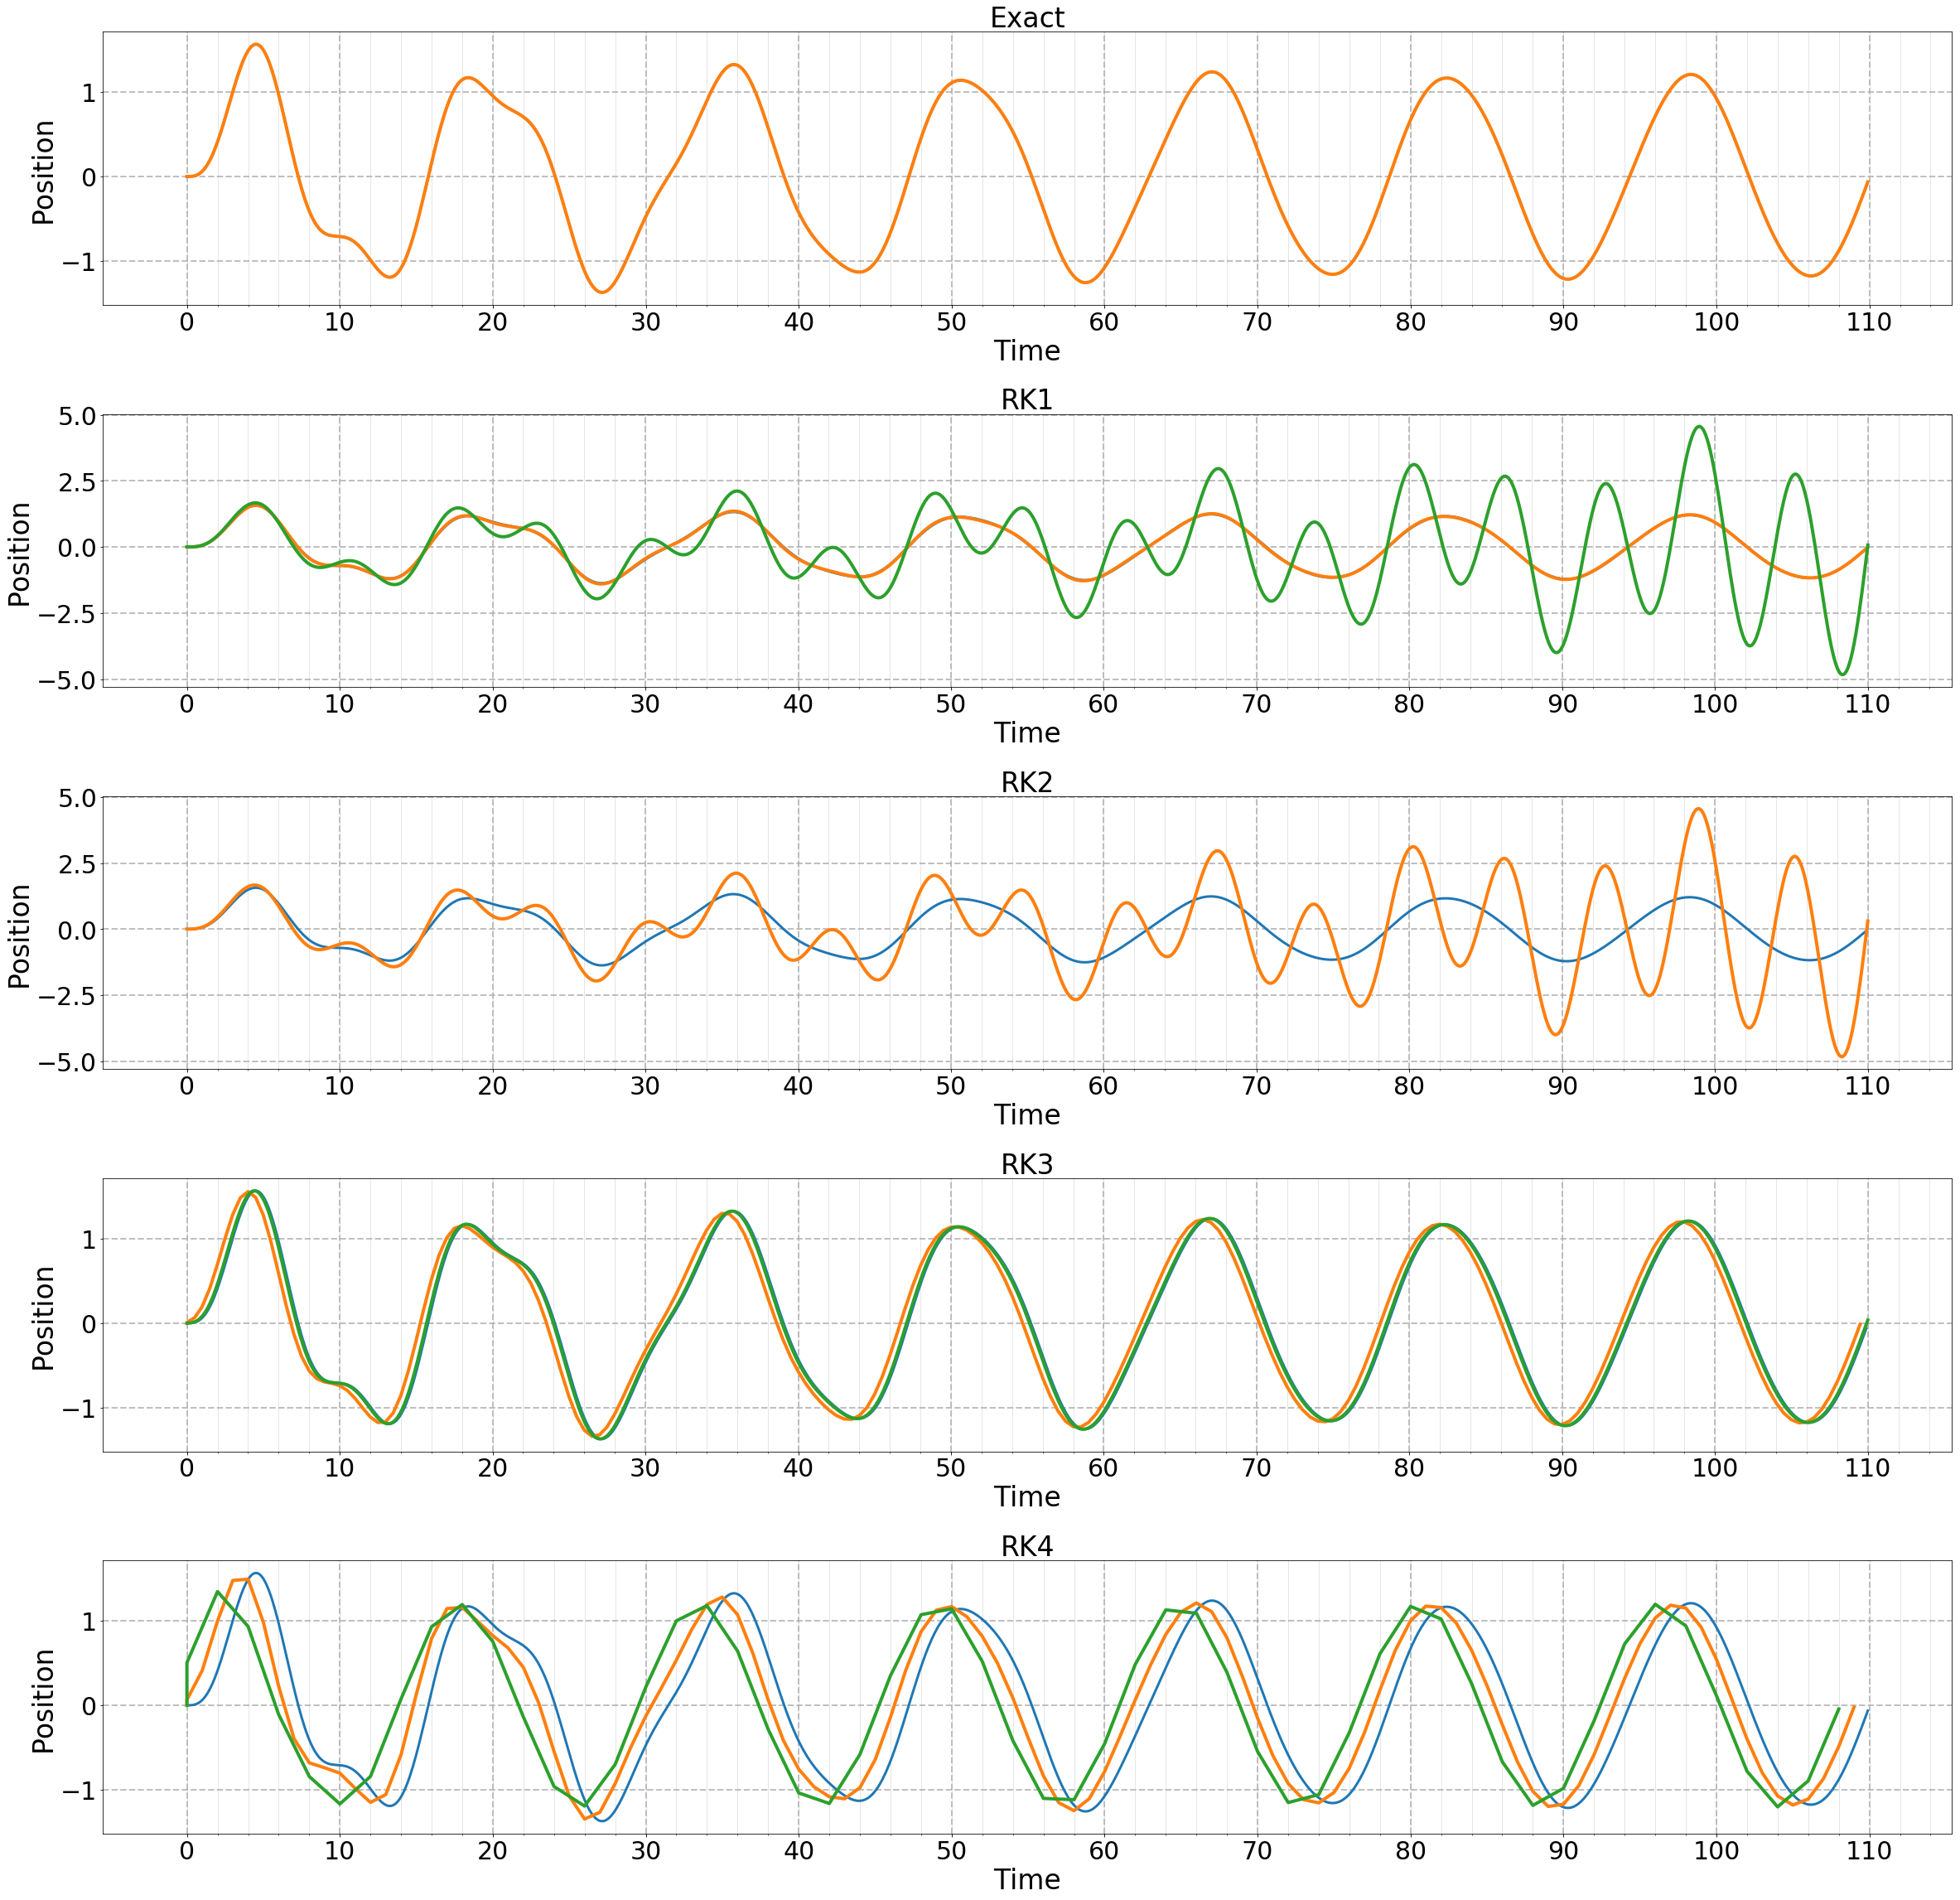

In [29]:

t_rk1_1 = sol_rk1_1[0]
t_rk1_2 = sol_rk1_2[0]
t_rk2_1 = sol_rk2_1[0]
t_rk2_2 = sol_rk2_2[0]
t_rk3_1 = sol_rk3_1[0]
t_rk3_2 = sol_rk3_2[0]
t_rk4_1 = sol_rk4_1[0]
t_rk4_2 = sol_rk4_2[0]

y_rk1_1 = []
for i in sol_rk1_1[1]:
    y_rk1_1.append(i[0])

y_rk1_2 =[]
for i in sol_rk1_2[1]:
    y_rk1_2.append(i[0])
    
y_rk2_1 =[]
for i in sol_rk2_1[1]:
    y_rk2_1.append(i[0])
    
y_rk2_2 =[]
for i in sol_rk2_2[1]:
    y_rk2_2.append(i[0])
    
y_rk3_1 =[]
for i in sol_rk3_1[1]:
    y_rk3_1.append(i[0])

y_rk3_2 =[]
for i in sol_rk3_2[1]:
    y_rk3_2.append(i[0])

y_rk4_1 =[]
for i in sol_rk4_1[1]:
    y_rk4_1.append(i[0])
    
y_rk4_2 =[]
for i in sol_rk4_2[1]:
    y_rk4_2.append(i[0])
    
fig = plt.figure(figsize=(40,40))
fig.tight_layout()
plt.subplots_adjust(hspace=0.4)
major_xticks = np.arange(0, 120, 10)                                              
minor_xticks = np.arange(0, 120, 2)  

'Plot the exact solution'
ax_exact = fig.add_subplot(511)
ax_exact.set_xticks(major_xticks)                                                       
ax_exact.set_xticks(minor_xticks, minor=True)                                           
#ax.set_yticks(major_ticks)                                                       
#ax.set_yticks(minor_ticks, minor=True)

ax_exact.grid(linestyle='--')
ax_exact.plot(t_exact, y_exact, linewidth=3)
ax_exact.set_title("Exact", fontsize=33)
plt.plot(t_exact, y_exact, linewidth=4)
ax_exact.grid(which='minor', alpha=0.4)                                                
ax_exact.grid(which='major', alpha=0.8,linewidth=2) 
ax_exact.tick_params(labelsize=30)
plt.xlabel('Time', fontsize=33)
plt.ylabel('Position', fontsize=33)

#Plot the RK1
ax_RK1 = fig.add_subplot(512)
#ax = plt.subplots(figsize=(40,10))

ax_RK1.set_xticks(major_xticks)                                                       
ax_RK1.set_xticks(minor_xticks, minor=True)                                           
#ax.set_yticks(major_ticks)                                                       
#ax.set_yticks(minor_ticks, minor=True)

ax_RK1.grid(linestyle='--')
ax_RK1.plot(t_exact, y_exact, linewidth=3)
ax_RK1.set_title("RK1", fontsize=33)
plt.plot(t_rk1_1, y_rk1_1, linewidth=4)
plt.plot(t_rk1_2, y_rk1_2, linewidth=4)
ax_RK1.grid(which='minor', alpha=0.4)                                                
ax_RK1.grid(which='major', alpha=0.8,linewidth=2) 
ax_RK1.tick_params(labelsize=30)
plt.xlabel('Time', fontsize=33)
plt.ylabel('Position', fontsize=33)

#Plot the RK2
ax_RK2 = fig.add_subplot(513)
#ax = plt.subplots(figsize=(40,10))

ax_RK2.set_xticks(major_xticks)                                                       
ax_RK2.set_xticks(minor_xticks, minor=True)                                           
#ax.set_yticks(major_ticks)                                                       
#ax.set_yticks(minor_ticks, minor=True)

ax_RK2.grid(linestyle='--')
ax_RK2.plot(t_exact, y_exact, linewidth=3)
ax_RK2.set_title("RK2", fontsize=33)
plt.plot(t_rk2_1, y_rk2_1, linewidth=4)
#plt.plot(t_rk2_2, y_rk2_2, linewidth=4)
ax_RK2.grid(which='minor', alpha=0.4)                                                
ax_RK2.grid(which='major', alpha=0.8,linewidth=2) 
ax_RK2.tick_params(labelsize=30)
plt.xlabel('Time', fontsize=33)
plt.ylabel('Position', fontsize=33)

#Plot the RK3
ax_RK3 = fig.add_subplot(514)
#ax = plt.subplots(figsize=(40,10))

ax_RK3.set_xticks(major_xticks)                                                       
ax_RK3.set_xticks(minor_xticks, minor=True)                                           
#ax.set_yticks(major_ticks)                                                       
#ax.set_yticks(minor_ticks, minor=True)

ax_RK3.grid(linestyle='--')
ax_RK3.plot(t_exact, y_exact, linewidth=3)
ax_RK3.set_title("RK3", fontsize=33)
plt.plot(t_rk3_1, y_rk3_1, linewidth=4)
plt.plot(t_rk3_2, y_rk3_2, linewidth=4)
ax_RK3.grid(which='minor', alpha=0.4)                                                
ax_RK3.grid(which='major', alpha=0.8,linewidth=2) 
ax_RK3.tick_params(labelsize=30)
plt.xlabel('Time', fontsize=33)
plt.ylabel('Position', fontsize=33)

#Plot the RK4
ax_RK4 = fig.add_subplot(515)
#ax = plt.subplots(figsize=(40,10))

ax_RK4.set_xticks(major_xticks)                                                       
ax_RK4.set_xticks(minor_xticks, minor=True)                                           
#ax.set_yticks(major_ticks)                                                       
#ax.set_yticks(minor_ticks, minor=True)

ax_RK4.grid(linestyle='--')
ax_RK4.plot(t_exact, y_exact, linewidth=3)
ax_RK4.set_title("RK4", fontsize=33)
plt.plot(t_rk4_1, y_rk4_1, linewidth=4)
plt.plot(t_rk4_2, y_rk4_2, linewidth=4)
ax_RK4.grid(which='minor', alpha=0.4)                                                
ax_RK4.grid(which='major', alpha=0.8,linewidth=2) 
ax_RK4.tick_params(labelsize=30)
plt.xlabel('Time', fontsize=33)
plt.ylabel('Position', fontsize=33)

plt.show()


## Heun's Predicator

Please refere to page 47

In [28]:
def heun(ode_function, tspan, y0, h):
    '''Heun's numerical integration algorithm
    
    Parameters:
        ode_function: derivate of f
        tspan: vector [t0, tf] giving the time interval for the solution
        y0: vector of the initial value of y
        h: time step
    '''
    tol = 1.0e-6
    itermax = 100
    
    t0 = tspan[0]
    tf = tspan[1]
    t = t0
    y = y0
    tout = [t]
    yout = [y]
    
    while t < tf:
        #h = min(t, tf - t)
        t1 = t
        y1 = y
        f1 = ode_function(t1, y1)
        y2 = y1 + f1*h
        t2 = t1 + h
        err = tol + 1
        iteration = 0
        while (err > tol) and (iteration <= itermax):
            y2p = y2
            f2 = ode_function(t2, y2p)
            favg = (f1 + f2) / 2.0
            y2 = y1 + favg * h
            err = max(abs(y2 - y2p)/(y2 + np.spacing(1)))
            iteration = iteration + 1
            
        if iteration > itermax:
            raise ValueError('Iteration limit reached')
        
        t = t + h
        y = y2
        tout.append(t)
        yout.append(y)
    
    return tout, yout

In [29]:
sol_heun = heun(rates, [0, 110], [0.0, 0.0], 0.1,)

In [30]:
len(sol_heun[0][:-1])

1101

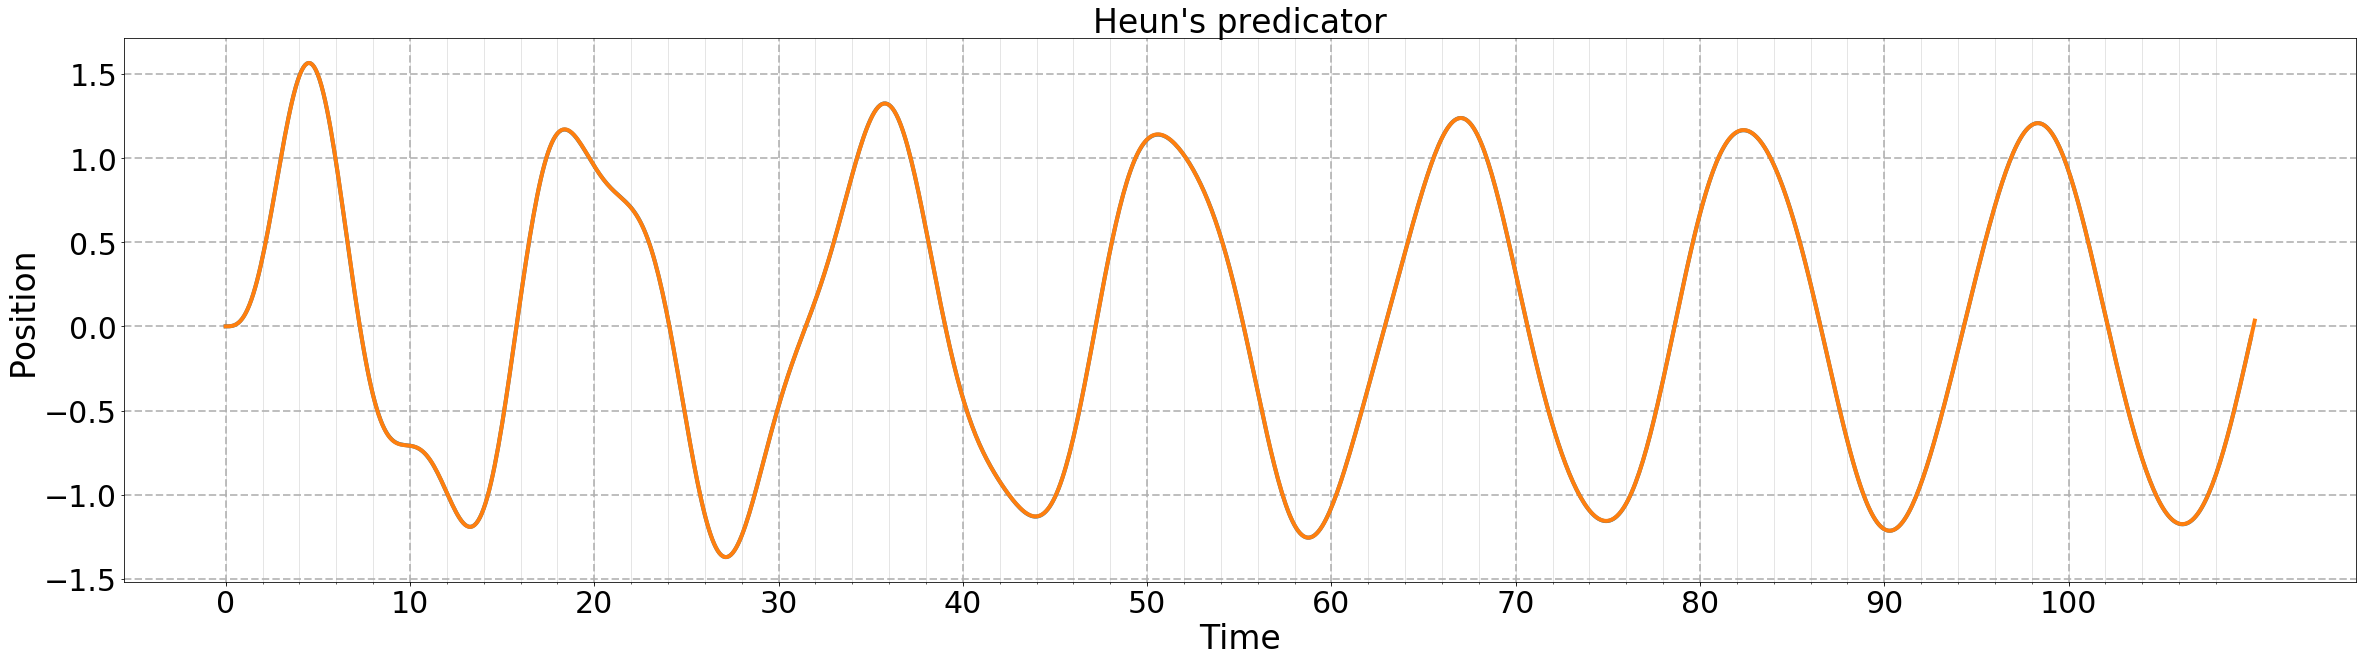

In [39]:
t_heun = sol_heun[0]
y_heun = []
for i in sol_heun[1]:
    y_heun.append(i[0])

major_xticks = np.arange(0, 110, 10)                                              
minor_xticks = np.arange(0, 110, 2)                                                   
    
fig, ax = plt.subplots(figsize=(40,10))
ax.set_title("Heun's predicator", fontsize=33)
ax.set_xticks(major_xticks)                                                       
ax.set_xticks(minor_xticks, minor=True)                                           
#ax.set_yticks(major_ticks)                                                       
#ax.set_yticks(minor_ticks, minor=True)

ax.grid(linestyle='--')
ax.plot(t_exact, y_exact, linewidth=4)
ax.plot(t_heun, y_heun, linewidth=4)
ax.grid(which='minor', alpha=0.4)                                                
ax.grid(which='major', alpha=0.8,linewidth=2) 
ax.tick_params(labelsize=30)
plt.xlabel('Time', fontsize=33)
plt.ylabel('Position', fontsize=33)
plt.show()    
 